In [571]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [715]:
unedited_df2.strain.unique()

In [145]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandas
import urllib
import re

from selenium import webdriver
from time import sleep
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys

from selenium.common.exceptions import NoSuchElementException, WebDriverException

import csv
import time

from tqdm import tqdm_notebook as tqdm

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

import pandas as pd
from sodapy import Socrata

import numpy as np
import datetime

import pandas as pd
pd.set_option("display.max_columns", 2200)
pd.set_option("display.max_rows", 200)
import numpy as np
import seaborn  as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline  
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
import re
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Keeping track of runtime.
import timeit

# Decision trees
from sklearn import tree
from IPython.display import Image

# Packages for rendering tree.
import pydotplus
import graphviz

import itertools #(for confusion matrix)

from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize

from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import requests as re
import tkinter as tk
from tkinter import font

import plotly_express as px

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [ ]:
#A quick look at https://www.leafly.com/explore/page-61/sort-alpha shows 
#that this is the last page of strains
pages = 61 
websites = []
strain_names = []

for i in range(pages+1):
    page_url = "https://www.leafly.com/explore/page-"+str(i)+"/sort-alpha"
    html = requests.get(page_url).text
    soup = BeautifulSoup(html,'html.parser')
    urls = soup.findAll("a",{"class":"ga_Explore_Strain_Tile"})
        
    for url in urls:
        strain_name = url.get('href')
        strain_names.append(strain_name)
        website = ("https://www.leafly.com" + strain_name)
        websites.append(website)

In [ ]:
#create url df
url_df = pd.DataFrame(websites, columns = ['url'])

In [ ]:
#create url csv
url_df.to_csv('urls.csv')

In [ ]:
#create strain_names csv
strains_df = pd.DataFrame(strain_names, columns = ['strain_name'])

In [ ]:
#create strain_names csv
strains_df.to_csv('strains.csv')

In [ ]:
#parse strain_name:
parsed =[]
for words in strains_df['strain_name']:
    parse = re.findall(r"[\w']+", words)
    parsed.append(parse)

In [ ]:
#create name and strain df

strain_type_df = pd.DataFrame(parsed, columns = ['strain', 'name1', 'name2',
                                    'name3', 'name4', 'name5', 'name6'])

In [ ]:
#drop last 5 columns - just fillers
strain_type_df.drop(df.tail(5).index,inplace=True)

In [ ]:
#merge name columns
strain_type_df['name'] = strain_type_df[strain_type_df.columns[1:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1)

In [ ]:
#drop unnecessary columns
strain_type_df.drop(['name1', 'name2', 'name3', 'name4', 'name5', 'name6'], axis=1, inplace=True)

In [ ]:
strain_type_df.to_csv('strain_type.csv')

In [ ]:
#number of duplicates
df['name'].duplicated().sum()

In [ ]:
url_df['url'].duplicated().sum()

In [ ]:
url_df.drop_duplicates(inplace=True)

In [ ]:
url_df.reset_index()

In [ ]:
len(url_df)

In [ ]:
#breaking down scraping into smaller buckets

urls_to_200 = urls_df['url'][:200]          #soups
urls_to_700 = urls_df['url'][200:700]       #soups_to_700
urls_to_1200 = urls_df['url'][700:1200]     #soups_to_1200
urls_to_1700 = urls_df['url'][1200:1700]    #soups_to_1700
urls_to_2200 = urls_df['url'][1700:2200]    #soups_to_2200
urls_to_2700 = urls_df['url'][2200:2700]    #soups_to_2700
urls_to_end = urls_df['url'][2700:]         #soups_to_end

#scraping all at once
urls_total = urls_df['url']                 #soups_total

In [ ]:
#scrape individual strain pages

soups_total = []

for url in urls_total:
    html = requests.get(url).text
    soup = BeautifulSoup(html,'html.parser')
    soups_total.append(soup)
    time.sleep(1)

In [ ]:
# with open("soups_total.html", "w") as file:
#     file.write(str(soups_total))

### Get Features From Tags

In [ ]:
#use this one

#collect positive effects

effect = []
filename1 = "effect.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href') 
            strain = strain_name.split('/')
        div = soups_total[i].find('div', {'id': 'effects-tab-content'})
        first_child = div.findChildren('div', {'class': "histogram-label"})
        try:
            if len(first_child) == 5:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                    first_child[2].text, first_child[3].text, 
                        first_child[4].text]
                par = {key:values}
            
            elif len(first_child) == 4:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text, first_child[3].text]
                par = {key:values}
            
            elif len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text]
                par = {key:values}
            
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    effect.append(par)

df_effect = pd.DataFrame(effect)
df_effect.to_csv(filename1)

#collect medical attributes

med = []
filename2 = "med.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href') 
            strain = strain_name.split('/')
        div = soups_total[i].find('div', {'id': 'medical-tab-content'})
        first_child = div.findChildren('div', {'class': "histogram-label"})
        try:
            if len(first_child) == 5:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                    first_child[2].text, first_child[3].text, 
                        first_child[4].text]
                par = {key:values}
            
            elif len(first_child) == 4:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text, first_child[3].text]
                par = {key:values}
            
            elif len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text]
                par = {key:values}
            
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    med.append(par)

df_med = pd.DataFrame(med)
df_med.to_csv(filename2)

#collect negative attributes

neg = []
filename3 = "neg.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href') 
            strain = strain_name.split('/')
        div = soups_total[i].find('div', {'id': 'negatives-tab-content'})
        first_child = div.findChildren('div', {'class': "histogram-label"})
        try:
            if len(first_child) == 5:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                    first_child[2].text, first_child[3].text, 
                        first_child[4].text]
                par = {key:values}
            
            elif len(first_child) == 4:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text, first_child[3].text]
                par = {key:values}
            
            elif len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text]
                par = {key:values}
            
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    neg.append(par)

df_neg = pd.DataFrame(neg)
df_neg.to_csv(filename3)

#collect flavors

flavors = []
filename4 = "flavors.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href')
            strain = strain_name.split('/')
        first_child = soups_total[i].findAll('div',attrs={"class" : "flavor-name"})
        try:
            if len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                        first_child[2].text]
                par = {key:values}
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    flavors.append(par)

df_flavors = pd.DataFrame(flavors)
df_flavors.to_csv(filename4)  

# #collect parents of strains

# parents = []

# filename5 = 'parents.csv'

# for i in tqdm(range(0, len(soups_total))): 
#     children = soups_total[i].findAll('div',attrs={"class" : "strain-tile-footer"})
#     try:
#         if len(children) == 3:
#             key = children[0].text
#             values = [children[1].text, children[2].text]
#             par = {key:values}
#         elif len(children) == 2:
#             key = children[0].text
#             values = children[1].text
#             par = {key:values}        
#         else:
#             key = children[0].text
#             values = None
#             par = {key:values}
#     except:
#         None
#         #print("can't find that page")
    
#     parents.append(par)
   

# df_parents = pd.DataFrame(parents)
# df_parents.to_csv(filename5)

In [ ]:
with open('soups_total.html', 'r') as f:
    html = f.read()
soups_total = BeautifulSoup(html,'html.parser')

### Import CSVs

In [ ]:
#import categories - hybrid, sativa, indica
cat_df = pd.read_csv('strain_category.csv')

#import flavors
flav_df = pd.read_csv('flavors.csv')

#import parents
par_df = pd.read_csv('parents.csv')

#import effects
eff_df = pd.read_csv('effect.csv')

#import medical
med_df = pd.read_csv('med.csv')

#import negative
neg_df = pd.read_csv('neg.csv')

### Pivot Tables/Table Formatting

In [ ]:
#drop first column
def drop_column(df):
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
drop_column(flav_df)
drop_column(par_df)
drop_column(eff_df)
drop_column(med_df)
drop_column(neg_df)
drop_column(cat_df)

In [ ]:
#pivot tables so that column names are now indices
flav_series = flav_df.stack()
par_series = par_df.stack()
eff_series = eff_df.stack()
med_series = med_df.stack()
neg_series = neg_df.stack()

#convert from series to dataframe
flav_df = flav_series.to_frame(name='flavor')
par_df = par_series.to_frame(name='parent')
eff_df = eff_series.to_frame(name='effect')
med_df = med_series.to_frame(name='medical')
neg_df = neg_series.to_frame(name='negative')

#dataframe cleanup
def reset_index(df):
    df.reset_index(inplace=True)
    df.drop('level_0', axis=1, inplace=True)
    df.rename(columns={'level_1':'strain'}, inplace=True)

In [ ]:
reset_index(flav_df)
reset_index(par_df)
reset_index(eff_df)
reset_index(med_df)
reset_index(neg_df)

In [ ]:
#cat_df.reset_index('name', inplace=True)
cat_df.rename(columns={'strain':'category'}, inplace=True)
cat_df.rename(columns={'name':'strain'}, inplace=True)

#remove $ from parents table
par_df['strain'] = [x.strip('$') for x in par_df.strain]

#make all entries lowercase
flav_df = flav_df.apply(lambda x: x.astype(str).str.lower())
par_df = par_df.apply(lambda x: x.astype(str).str.lower())
eff_df = eff_df.apply(lambda x: x.astype(str).str.lower())
med_df = med_df.apply(lambda x: x.astype(str).str.lower())
neg_df = neg_df.apply(lambda x: x.astype(str).str.lower())
cat_df = cat_df.apply(lambda x: x.astype(str).str.lower())


#replace - with space in all tables
flav_df['strain'] = flav_df['strain'].str.replace('-',' ')
par_df['strain'] = par_df['strain'].str.replace('-',' ')
eff_df['strain'] = eff_df['strain'].str.replace('-',' ')
med_df['strain'] = med_df['strain'].str.replace('-',' ')
neg_df['strain'] = neg_df['strain'].str.replace('-',' ')
cat_df['strain'] = cat_df['strain'].str.replace('-',' ')


# #make all data lowercase
# def lowercase(df):
#     df = df.apply(lambda x: x.astype(str).str.lower())
#     return
    
# #replace dash with space in all tables
# def replace_dash(df, column):
#     df[column] = df[column].str.replace('-',' ')
#     return

In [ ]:
def remove_char(df, column):
    df[column] = df[column].str.replace('[',' ')
    df[column] = df[column].str.replace(']',' ')
    df[column] = df[column].str.replace("'",'')
    

def new_columns_5(df, column):    
    
    # new data frame with split value columns 
    # making separate first flavor from new data frame 
    new1 = df[column].str.split(',', n = 1, expand = True)   
    df[str(column) + '_1'] = new1[0] 
    df[str(column) + '_2'] = new1[1]


    new2 = df[str(column) + '_2'].str.split(',', n = 1, expand = True)  
    df[str(column) + '_2']= new2[0] 
    df[str(column) + '_3']= new2[1] 
  
    new3 = df[str(column) + '_3'].str.split(',', n = 1, expand = True)
    df[str(column) + '_3']= new3[0]
    df[str(column) + '_4']= new3[1]


    new4 = df[str(column) + '_4'].str.split(',', n = 1, expand = True)
    df[str(column) + '_4']= new4[0]
    df[str(column) + '_5']= new4[1]


    #dropping old name columns 
    df.drop(columns =[column], inplace = True) 
    
def new_columns_3(df, column):    
    
    # new data frame with split value columns 
    # making separate first flavor from new data frame 
    new1 = df[column].str.split(',', n = 1, expand = True)   
    df[str(column) + '_1'] = new1[0] 
    df[str(column) + '_2'] = new1[1]


    new2 = df[str(column) + '_2'].str.split(',', n = 1, expand = True)  
    df[str(column) + '_2']= new2[0] 
    df[str(column) + '_3']= new2[1] 
  
    new3 = df[str(column) + '_3'].str.split(',', n = 1, expand = True)
    df[str(column) + '_3']= new3[0]

    #dropping old name columns 
    df.drop(columns =[column], inplace = True) 
    
def new_columns_2(df, column):    
    
    # new data frame with split value columns 
    # making separate first flavor from new data frame 
    new1 = df[column].str.split(',', n = 1, expand = True)   
    df[str(column) + '_1'] = new1[0] 
    df[str(column) + '_2'] = new1[1]

    #dropping old name columns 
    df.drop(columns =[column], inplace = True)

In [ ]:
remove_char(flav_df, 'flavor')
remove_char(par_df, 'parent')
remove_char(eff_df, 'effect')
remove_char(med_df, 'medical')
remove_char(neg_df, 'negative')
remove_char(cat_df, 'category')

In [ ]:
new_columns_5(eff_df, 'effect')
new_columns_5(med_df, 'medical')
new_columns_5(neg_df, 'negative')

In [ ]:
new_columns_3(flav_df, 'flavor')
new_columns_2(par_df, 'parent')

In [ ]:
par_df['strain'] = par_df['strain'].str.replace("'",'')

### Create Final Merged Dataframe

In [ ]:
#create properly formatted csvs

flav_final_df = pd.DataFrame(flav_df)
flav_final_df.to_csv('flav_final_df.csv')

par_final_df = pd.DataFrame(par_df)
par_final_df.to_csv('par_final_df.csv')

eff_final_df = pd.DataFrame(eff_df)
eff_final_df.to_csv('eff_final_df.csv')

med_final_df = pd.DataFrame(med_df)
med_final_df.to_csv('med_final_df.csv')

neg_final_df = pd.DataFrame(neg_df)
neg_final_df.to_csv('neg_final_df.csv')

cat_final_df = pd.DataFrame(cat_df)
cat_final_df.to_csv('cat_final_df.csv')

In [ ]:
#import final csvs

flav_df = pd.read_csv('flav_final_df.csv')
par_df = pd.read_csv('par_final_df.csv')
eff_df = pd.read_csv('eff_final_df.csv')
med_df = pd.read_csv('med_final_df.csv')
neg_df = pd.read_csv('neg_final_df.csv')
cat_df = pd.read_csv('cat_final_df.csv')

In [ ]:
#create master dataframe
drop_column(flav_df)
drop_column(par_df)
drop_column(eff_df)
drop_column(med_df)
drop_column(neg_df)
drop_column(cat_df)

final_df = pd.merge(cat_df, eff_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, med_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, neg_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, flav_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, par_df, how='outer')
final_df.drop_duplicates(inplace=True)

final_df.to_csv('final_df.csv')

In [ ]:
total_reviews = pd.read_csv('total_reviews.csv')

In [ ]:
final_df = pd.merge(final_df, total_reviews, how='outer')

In [ ]:
final_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
final_df.drop_duplicates(inplace=True)

In [ ]:
# final_df.to_csv('final_df.csv')

In [ ]:
final_df = pd.read_csv('final_df.csv')

In [ ]:
final_df.drop('parent_1', axis=1, inplace=True)

In [ ]:
final_df.drop('parent_2', axis=1, inplace=True)

In [ ]:
master_parent = pd.read_csv('master_parent.csv')

In [ ]:
final_df = pd.merge(final_df, master_parent, on='strain')

In [ ]:
final_df.drop('Unnamed: 0_y', axis=1, inplace=True)

In [ ]:
final_df.drop('Unnamed: 0_x', axis=1, inplace=True)

In [ ]:
final_df.drop_duplicates(inplace=True)

In [ ]:
# final_df.to_csv('master_final.csv')

In [ ]:
""" I needed to rescrape to get additional information and in the process my ip got blocked.
    I moved to working in smaller scrape batches. I then needed to append each of my smaller
    batches into a master table. """

In [ ]:
urls = pd.read_csv('urls.csv')

In [ ]:
urls_list = urls['url']

In [ ]:
#urls_to_156 = urls_list[:156]                  #parents1.csv
#urls_156_to_312 = urls_list[156:312]           #parents2.csv
#urls_312_to_468 = urls_list[312:468]           #parents3.csv
#urls_468_to_624 = urls_list[468:624]           #parents4.csv
#urls_624_to_780 = urls_list[624:780]           #parents5.csv
#urls_780_to_936 = urls_list[780:936]            #parents6.csv
#urls_936_to_1092 = urls_list[936:1092]          #parents7.csv
#urls_1092_to_1248 = urls_list[1092:1248]        #parents8.csv
#urls_1248_to_1404 = urls_list[1248:1404]        #parents9.csv
#urls_1404_to_1560 = urls_list[1404:1560]        #parents10.csv
urls_1560_to_1716 = urls_list[1560:1716]        #parents11.csv
urls_1716_to_1872 = urls_list[1716:1872]        #parents12.csv
urls_1872_to_2028 = urls_list[1872:2028]        #parents13.csv
urls_2028_to_2184 = urls_list[2028:2184]        #parents14.csv
urls_2184_to_2340 = urls_list[2184:2340]        #parents15.csv
urls_2340_to_2496 = urls_list[2340:2496]        #parents16.csv
urls_2496_to_2652 = urls_list[2496:2652]        #parents17.csv
urls_2652_to_2808 = urls_list[2652:2808]        #parents18.csv
urls_2808_to_2964 = urls_list[2808:2964]        #parents19.csv
urls_2964_to_3120 = urls_list[2964:3120]        #parents20.csv
urls_3120_to_3276 = urls_list[3120:3276]        #parents21.csv
urls_3276_to_3432 = urls_list[3276:]            #parents22.csv


#urls_1560_to_2060 = urls_list[1560:2060]         #parents11.csv
#urls_2060_to_2560 = urls_list[2060:2560]         #parents12.csv
#urls_2560_to_3060 = urls_list[2560:3060]         #parents13.csv
#urls_3060_to_end = urls_list[3060:]              #parents14.csv

In [ ]:
# #scrape for review totals and parents

parents = []
reviews = []

for url in tqdm(urls_list):
    html = requests.get(url).text
    soup = BeautifulSoup(html,'html.parser')

    try:
        container = soup.find("a",{"class":"active"})  
        strain_name = container.get('href') 
        strain = strain_name.split('/')
    except:
        None
    
    try:
        parent = soup.findAll('div',attrs={"class" : "strain-tile-footer"})
        parents.append(parent)
    except:
        parents.append(strain[2], None)
    
    try:
        container = soup.find("a",{"class":"active"})  
        strain_name = container.get('href') 
        strain = strain_name.split('/')
        review_total = soup.find('a',attrs={"onclick" : "window.strainHelpers.trackEvent('User Interactions', 'Strain Details', 'View all Reviews')"}).text
        review = review_total[review_total.find("(")+1:review_total.find(")")]
        rev_name = [strain[2], review]
    except:
        rev_name = [strain[2], None]
    
    reviews.append(rev_name)

time.sleep(1)

In [ ]:
#scrape for parents
# change varaible in 6 places

parents14_ = []

for url in tqdm(urls_3060_to_end):
    html = requests.get(url).text
    soup = BeautifulSoup(html,'html.parser')

    try:

        children = soup.findAll('div',attrs={"class" : "strain-tile-footer"})
        parents14_.append(children)
    
    except:
        None

    time.sleep(2)        
 
parents14 = pd.DataFrame(parents14_)
parents14.to_csv('parents14.csv')

In [ ]:
review_totals = pd.DataFrame(reviews)
review_totals.to_csv('review_totals.csv')

In [ ]:
parents_final = pd.DataFrame(parents)
parents_final.to_csv('parents_final.csv')

In [ ]:
review_totals.rename(columns=({0:'strain', 1:'review_total'}), inplace=True)

In [ ]:
review_totals.to_csv('review_totals.csv')
parents_final.to_csv('parents_final.csv')

In [ ]:
review_totals = pd.read_csv('review_totals.csv')
parents_final = pd.read_csv('parents_final.csv')

In [ ]:
total_reviews = pd.read_csv('review_totals.csv')

In [ ]:
total_reviews.drop('Unnamed: 0', axis = 1, inplace=True)

In [ ]:
total_reviews.drop('Unnamed: 0.1', axis = 1, inplace=True)

In [ ]:
total_reviews['strain'] = total_reviews['strain'].str.replace('-',' ')

In [ ]:
total_reviews.to_csv('total_reviews.csv')

In [ ]:
parents = pd.read_csv('parents_final.csv')

In [ ]:
final = pd.read_csv('final_df.csv')

In [ ]:
parent1a = pd.read_csv('parents1.csv')
parent2a = pd.read_csv('parents2.csv')
parent3a = pd.read_csv('parents3.csv')
parent4a = pd.read_csv('parents4.csv')
parent5a = pd.read_csv('parents5.csv')
parent6a = pd.read_csv('parents6.csv')
parent7a = pd.read_csv('parents7.csv')
parent8a = pd.read_csv('parents8.csv')
parent9a = pd.read_csv('parents9.csv')
parent10a = pd.read_csv('parents10.csv')
parent11a = pd.read_csv('parents11.csv')
parent12a = pd.read_csv('parents12.csv')
parent13a = pd.read_csv('parents13.csv')
parent14a = pd.read_csv('parents14.csv')
# parent15a = pd.read_csv('parents15.csv')
# parent16a = pd.read_csv('parents16.csv')
# parent17a = pd.read_csv('parents17.csv')
# parent18a = pd.read_csv('parents18.csv')
# parent19a = pd.read_csv('parents19.csv')
# parent20a = pd.read_csv('parents20.csv')
# parent21a = pd.read_csv('parents21.csv')
# parent22a = pd.read_csv('parents22.csv')

In [ ]:
append_list = [parent2a, parent3a, parent4a, parent5a, parent6a, parent7a,
              parent8a, parent9a, parent10a, parent11a, parent12a, parent13a,
              parent14a]             

In [ ]:
master_df = parent1a.append(append_list, ignore_index = True) 

In [ ]:
# master_df.to_csv('master_df.csv')

In [ ]:
master_df = pd.read_csv('master_df.csv')

In [ ]:
def split_string(string):
    try:
        return re.findall('<div class="strain-tile-footer">(.+)</div>', string)
    except:
        return 'n'

In [ ]:
master_df['7'] = master_df['7'].apply(split_string)
master_df.replace('N, o, n, e', 'n')
master_df['7'] = master_df['7'].apply(', '.join)
master_df['7'] = [x.strip('$') for x in master_df['7']]
master_df['7'] = master_df['7'].str.lower()

In [ ]:
def format_values(df, column):
    df[column] = df[column].apply(split_string)
    df[column] = df[column].apply(', '.join)
    df[column] = [x.strip('$') for x in df[column]]
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace("'",'')
    df[column] = df[column].str.replace(".",'')
    df[column] = df[column].str.replace("#",'')

In [ ]:
format_values(master_df, '7')

In [ ]:
master_df.rename(columns={'0': 'strain', '1':'parent_1', '2':'parent_2',
                         '3':'parent_3', '4':'parent_4', '5':'parent_5',
                         '6':'parent_6', '7':'parent_7'}, inplace=True)

In [ ]:
master_df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [ ]:
# master_df.to_csv('master_parent.csv')

### Analysis

In [592]:
#import csv

final_df = pd.read_csv('master_final_copy.csv')
#final_df.drop('Unnamed: 0', axis=1, inplace=True)

#strip leading numbers from flavors columns
final_df['flavor_1'] = final_df['flavor_1'].str.strip('1. ')
final_df['flavor_2'] = final_df['flavor_2'].str.strip('2. ')
final_df['flavor_3'] = final_df['flavor_3'].str.strip('3. ')
# final_df.fillna('none', inplace=True)

In [594]:
def clean(df, column): 
    df[column] = df[column].str.replace('"','')
    df[column] = df[column].str.replace('#','')
    df[column] = df[column].str.replace(' ','')

In [595]:
clean(final_df, 'effect_1')
clean(final_df, 'effect_2')
clean(final_df, 'effect_3')
clean(final_df, 'effect_4')
clean(final_df, 'effect_5')
clean(final_df, 'medical_1')
clean(final_df, 'medical_2')
clean(final_df, 'medical_3')
clean(final_df, 'medical_4')
clean(final_df, 'medical_5')
clean(final_df, 'negative_1')
clean(final_df, 'negative_2')
clean(final_df, 'negative_3')
clean(final_df, 'negative_4')
clean(final_df, 'negative_5')
clean(final_df, 'flavor_1')
clean(final_df, 'flavor_2')
clean(final_df, 'flavor_3')

In [596]:
final_df.duplicated().sum()

0

In [597]:
final_df.replace('n',np.NaN)

,category,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3,review_total,parent_1,parent_2,parent_3,parent_4,parent_5,parent_6,parent_7
0,hybrid,22,energetic,focused,happy,uplifted,creative,pain,depression,fatigue,stress,musclespasms,headache,NaN,NaN,NaN,NaN,diesel,pine,skunk,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,indica,999,relaxed,creative,euphoric,happy,uplifted,stress,spasticity,depression,seizures,musclespasms,anxious,dryeyes,drymouth,paranoid,dizzy,citrus,earthy,pine,3.0,tahoe og kush,triangle kush,biker kush,NaN,NaN,NaN,NaN
2,sativa,1024,uplifted,energetic,happy,relaxed,focused,pain,fatigue,depression,stress,inflammation,drymouth,dryeyes,dizzy,paranoid,anxious,tropical,mint,blueberry,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hybrid,100 og,happy,uplifted,relaxed,euphoric,sleepy,stress,pain,depression,insomnia,lackofappetite,drymouth,dizzy,dryeyes,anxious,paranoid,earthy,diesel,pungent,508.0,og kush,NaN,NaN,NaN,NaN,NaN,NaN
4,hybrid,12 year og,focused,creative,hungry,euphoric,aroused,depression,pain,stress,NaN,NaN,anxious,dizzy,dryeyes,drymouth,headache,diesel,NaN,NaN,2.0,og kush,NaN,NaN,NaN,NaN,NaN,NaN
5,hybrid,13 dawgs,sleepy,euphoric,focused,energetic,relaxed,pain,depression,stress,inflammation,fatigue,anxious,dryeyes,headache,drymouth,NaN,diesel,apricot,citrus,11.0,g13,chemdawg,NaN,NaN,NaN,NaN,NaN
6,hybrid,24k gold,happy,relaxed,euphoric,uplifted,creative,stress,depression,pain,fatigue,insomnia,drymouth,dryeyes,dizzy,anxious,headache,orange,citrus,sweet,219.0,kosher kush,tangie,NaN,NaN,NaN,NaN,NaN
7,indica,3 bears og,relaxed,giggly,sleepy,tingly,energetic,pain,stress,lackofappetite,musclespasms,insomnia,drymouth,dryeyes,headache,anxious,NaN,diesel,sweet,butter,7.0,triangle kush,NaN,NaN,NaN,NaN,NaN,NaN
8,hybrid,3 kings,happy,relaxed,uplifted,euphoric,energetic,stress,pain,depression,headaches,eyepressure,drymouth,dryeyes,dizzy,headache,paranoid,earthy,diesel,pine,324.0,headband,sour diesel,og kush,NaN,NaN,NaN,NaN
9,indica,303 og,focused,relaxed,uplifted,euphoric,sleepy,pain,depression,insomnia,musclespasms,headaches,drymouth,dryeyes,dizzy,anxious,NaN,diesel,earthy,woody,82.0,pre-98 bubba kush,chemdawg,NaN,NaN,NaN,NaN,NaN


### Dummy Categories

In [598]:
category_dummies = pd.get_dummies(final_df['category'], prefix="cat_")
effect1_dummies = pd.get_dummies(final_df['effect_1'], prefix="eff1_")
effect2_dummies = pd.get_dummies(final_df['effect_2'], prefix="eff2_")
effect3_dummies = pd.get_dummies(final_df['effect_3'], prefix="eff3_")
effect4_dummies = pd.get_dummies(final_df['effect_4'], prefix="eff4_")
effect5_dummies = pd.get_dummies(final_df['effect_5'], prefix="eff5_")
med1_dummies = pd.get_dummies(final_df['medical_1'], prefix="med1_")
med2_dummies = pd.get_dummies(final_df['medical_2'], prefix="med2_")
med3_dummies = pd.get_dummies(final_df['medical_3'], prefix="med3_")
med4_dummies = pd.get_dummies(final_df['medical_4'], prefix="med4_")
med5_dummies = pd.get_dummies(final_df['medical_5'], prefix="med5_")
neg1_dummies = pd.get_dummies(final_df['negative_1'], prefix="neg1_")
neg2_dummies = pd.get_dummies(final_df['negative_2'], prefix="neg2_")
neg3_dummies = pd.get_dummies(final_df['negative_3'], prefix="neg3_")
neg4_dummies = pd.get_dummies(final_df['negative_4'], prefix="neg4_")
neg5_dummies = pd.get_dummies(final_df['negative_5'], prefix="neg5_")
flav1_dummies = pd.get_dummies(final_df['flavor_1'], prefix="flav1_")
flav2_dummies = pd.get_dummies(final_df['flavor_2'], prefix="flav2_")
flav3_dummies = pd.get_dummies(final_df['flavor_3'], prefix="flav3_")


final_df = pd.concat([final_df, category_dummies],axis=1)
final_df = pd.concat([final_df, effect1_dummies],axis=1)
final_df = pd.concat([final_df, effect2_dummies],axis=1)
final_df = pd.concat([final_df, effect3_dummies],axis=1)
final_df = pd.concat([final_df, effect4_dummies],axis=1)
final_df = pd.concat([final_df, effect5_dummies],axis=1)
final_df = pd.concat([final_df, med1_dummies],axis=1)
final_df = pd.concat([final_df, med2_dummies],axis=1)
final_df = pd.concat([final_df, med3_dummies],axis=1)
final_df = pd.concat([final_df, med4_dummies],axis=1)
final_df = pd.concat([final_df, med5_dummies],axis=1)
final_df = pd.concat([final_df, neg1_dummies],axis=1)
final_df = pd.concat([final_df, neg2_dummies],axis=1)
final_df = pd.concat([final_df, neg3_dummies],axis=1)
final_df = pd.concat([final_df, neg4_dummies],axis=1)
final_df = pd.concat([final_df, neg5_dummies],axis=1)
final_df = pd.concat([final_df, flav1_dummies],axis=1)
final_df = pd.concat([final_df, flav2_dummies],axis=1)
final_df = pd.concat([final_df, flav3_dummies],axis=1)

In [599]:
to_drop = ['category', 'effect_1', 'effect_2', 'effect_3', 'effect_4',
          'effect_5', 'medical_1', 'medical_2', 'medical_3', 'medical_4',
          'medical_5', 'negative_1', 'negative_2', 'negative_3', 'negative_4',
          'negative_5', 'flavor_1', 'flavor_2', 'flavor_3', 'review_total', 
           'parent_1', 'parent_2', 
           'parent_3', 'parent_4', 'parent_5', 
           'parent_6', 'parent_7']
final_df.drop(to_drop, axis=1, inplace=True)

In [600]:
final_df.duplicated().sum()

24

In [601]:
final_df.drop_duplicates(inplace=True)

In [602]:
final_df.reset_index(inplace=True)

In [603]:
final_df.drop('index', axis=1, inplace=True)

In [604]:
len(final_df)

2621

### Go With This Dataframe For Analysis

### Dataframe With Removed Strains That Had Missing Effects, Medical and Negative Attributes

In [808]:
#import csv

final_df2 = pd.read_csv('master_final_copy.csv')
#final_df.drop('Unnamed: 0', axis=1, inplace=True)

#strip leading numbers from flavors columns
final_df2['flavor_1'] = final_df2['flavor_1'].str.strip('1. ')
final_df2['flavor_2'] = final_df2['flavor_2'].str.strip('2. ')
final_df2['flavor_3'] = final_df2['flavor_3'].str.strip('3. ')
# final_df.fillna('none', inplace=True)

In [717]:
final_df2.replace('n',np.NaN)

,category,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3,review_total,parent_1,parent_2,parent_3,parent_4,parent_5,parent_6,parent_7
0,hybrid,22,energetic,focused,happy,uplifted,creative,pain,depression,fatigue,stress,muscle spasms,headache,NaN,NaN,NaN,NaN,diesel,pine,skunk,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,indica,999,relaxed,creative,euphoric,happy,uplifted,stress,spasticity,depression,seizures,muscle spasms,anxious,dry eyes,dry mouth,paranoid,dizzy,citrus,earthy,pine,3.0,tahoe og kush,triangle kush,biker kush,NaN,NaN,NaN,NaN
2,sativa,1024,uplifted,energetic,happy,relaxed,focused,pain,fatigue,depression,stress,inflammation,dry mouth,dry eyes,dizzy,paranoid,anxious,tropical,mint,blueberry,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hybrid,100 og,happy,uplifted,relaxed,euphoric,sleepy,stress,pain,depression,insomnia,lack of appetite,dry mouth,dizzy,dry eyes,anxious,paranoid,earthy,diesel,pungent,508.0,og kush,NaN,NaN,NaN,NaN,NaN,NaN
4,hybrid,12 year og,focused,creative,hungry,euphoric,aroused,depression,pain,stress,NaN,NaN,anxious,dizzy,dry eyes,dry mouth,headache,diesel,NaN,NaN,2.0,og kush,NaN,NaN,NaN,NaN,NaN,NaN
5,hybrid,13 dawgs,sleepy,euphoric,focused,energetic,relaxed,pain,depression,stress,inflammation,fatigue,anxious,dry eyes,headache,dry mouth,NaN,diesel,apricot,citrus,11.0,g13,chemdawg,NaN,NaN,NaN,NaN,NaN
6,hybrid,24k gold,happy,relaxed,euphoric,uplifted,creative,stress,depression,pain,fatigue,insomnia,dry mouth,dry eyes,dizzy,anxious,headache,orange,citrus,sweet,219.0,kosher kush,tangie,NaN,NaN,NaN,NaN,NaN
7,indica,3 bears og,relaxed,giggly,sleepy,tingly,energetic,pain,stress,lack of appetite,muscle spasms,insomnia,dry mouth,dry eyes,headache,anxious,NaN,diesel,sweet,butter,7.0,triangle kush,NaN,NaN,NaN,NaN,NaN,NaN
8,hybrid,3 kings,happy,relaxed,uplifted,euphoric,energetic,stress,pain,depression,headaches,eye pressure,dry mouth,dry eyes,dizzy,headache,paranoid,earthy,diesel,pine,324.0,headband,sour diesel,og kush,NaN,NaN,NaN,NaN
9,indica,303 og,focused,relaxed,uplifted,euphoric,sleepy,pain,depression,insomnia,muscle spasms,headaches,dry mouth,dry eyes,dizzy,anxious,NaN,diesel,earthy,woody,82.0,pre-98 bubba kush,chemdawg,NaN,NaN,NaN,NaN,NaN


In [809]:
clean(final_df2, 'effect_1')
clean(final_df2, 'effect_2')
clean(final_df2, 'effect_3')
clean(final_df2, 'effect_4')
clean(final_df2, 'effect_5')
clean(final_df2, 'medical_1')
clean(final_df2, 'medical_2')
clean(final_df2, 'medical_3')
clean(final_df2, 'medical_4')
clean(final_df2, 'medical_5')
clean(final_df2, 'negative_1')
clean(final_df2, 'negative_2')
clean(final_df2, 'negative_3')
clean(final_df2, 'negative_4')
clean(final_df2, 'negative_5')
clean(final_df2, 'flavor_1')
clean(final_df2, 'flavor_2')
clean(final_df2, 'flavor_3')

In [810]:
category_dummies = pd.get_dummies(final_df2['category'], prefix="cat_")
effect1_dummies = pd.get_dummies(final_df2['effect_1'], prefix="eff1_")
effect2_dummies = pd.get_dummies(final_df2['effect_2'], prefix="eff2_")
effect3_dummies = pd.get_dummies(final_df2['effect_3'], prefix="eff3_")
effect4_dummies = pd.get_dummies(final_df2['effect_4'], prefix="eff4_")
effect5_dummies = pd.get_dummies(final_df2['effect_5'], prefix="eff5_")
med1_dummies = pd.get_dummies(final_df2['medical_1'], prefix="med1_")
med2_dummies = pd.get_dummies(final_df2['medical_2'], prefix="med2_")
med3_dummies = pd.get_dummies(final_df2['medical_3'], prefix="med3_")
med4_dummies = pd.get_dummies(final_df2['medical_4'], prefix="med4_")
med5_dummies = pd.get_dummies(final_df2['medical_5'], prefix="med5_")
neg1_dummies = pd.get_dummies(final_df2['negative_1'], prefix="neg1_")
neg2_dummies = pd.get_dummies(final_df2['negative_2'], prefix="neg2_")
neg3_dummies = pd.get_dummies(final_df2['negative_3'], prefix="neg3_")
neg4_dummies = pd.get_dummies(final_df2['negative_4'], prefix="neg4_")
neg5_dummies = pd.get_dummies(final_df2['negative_5'], prefix="neg5_")
flav1_dummies = pd.get_dummies(final_df2['flavor_1'], prefix="flav1_")
flav2_dummies = pd.get_dummies(final_df2['flavor_2'], prefix="flav2_")
flav3_dummies = pd.get_dummies(final_df2['flavor_3'], prefix="flav3_")


final_df2 = pd.concat([final_df2, category_dummies],axis=1)
final_df2 = pd.concat([final_df2, effect1_dummies],axis=1)
final_df2 = pd.concat([final_df2, effect2_dummies],axis=1)
final_df2 = pd.concat([final_df2, effect3_dummies],axis=1)
final_df2 = pd.concat([final_df2, effect4_dummies],axis=1)
final_df2 = pd.concat([final_df2, effect5_dummies],axis=1)
final_df2 = pd.concat([final_df2, med1_dummies],axis=1)
final_df2 = pd.concat([final_df2, med2_dummies],axis=1)
final_df2 = pd.concat([final_df2, med3_dummies],axis=1)
final_df2 = pd.concat([final_df2, med4_dummies],axis=1)
final_df2 = pd.concat([final_df2, med5_dummies],axis=1)
final_df2 = pd.concat([final_df2, neg1_dummies],axis=1)
final_df2 = pd.concat([final_df2, neg2_dummies],axis=1)
final_df2 = pd.concat([final_df2, neg3_dummies],axis=1)
final_df2 = pd.concat([final_df2, neg4_dummies],axis=1)
final_df2 = pd.concat([final_df2, neg5_dummies],axis=1)
final_df2 = pd.concat([final_df2, flav1_dummies],axis=1)
final_df2 = pd.concat([final_df2, flav2_dummies],axis=1)
final_df2 = pd.concat([final_df2, flav3_dummies],axis=1)

In [811]:
to_drop = ['category', 'effect_1', 'effect_2', 'effect_3', 'effect_4',
          'effect_5', 'medical_1', 'medical_2', 'medical_3', 'medical_4',
          'medical_5', 'negative_1', 'negative_2', 'negative_3', 'negative_4',
          'negative_5', 'flavor_1', 'flavor_2', 'flavor_3', 'review_total', 
           'parent_1', 'parent_2', 
           'parent_3', 'parent_4', 'parent_5', 
           'parent_6', 'parent_7']
final_df2.drop(to_drop, axis=1, inplace=True)

In [812]:
final_df2.duplicated().sum()

24

In [813]:
final_df2.drop_duplicates(inplace=True)

In [814]:
final_df2.reset_index(inplace=True)

In [815]:
final_df2.drop('index', axis=1, inplace=True)

In [816]:
len(final_df2)

2621

### Using Undummied Dataframe For Vectorization

In [726]:
#df that isn't dummied

unedited_df2 = pd.read_csv('master_final_copy.csv')
#unedited_df2.drop('Unnamed: 0', axis=1, inplace=True)
unedited_df2.fillna('none', inplace=True)

#strip leading numbers from flavors columns
unedited_df2['flavor_1'] = unedited_df2['flavor_1'].str.strip('1. ')
unedited_df2['flavor_2'] = unedited_df2['flavor_2'].str.strip('2. ')
unedited_df2['flavor_3'] = unedited_df2['flavor_3'].str.strip('3. ')


to_drop = ['review_total', 'parent_1', 'parent_2', 
           'parent_3', 'parent_4', 'parent_5', 
           'parent_6', 'parent_7']

unedited_df2.drop(to_drop, axis=1, inplace=True)

In [727]:
clean(unedited_df2, 'effect_1')
clean(unedited_df2, 'effect_2')
clean(unedited_df2, 'effect_3')
clean(unedited_df2, 'effect_4')
clean(unedited_df2, 'effect_5')
clean(unedited_df2, 'medical_1')
clean(unedited_df2, 'medical_2')
clean(unedited_df2, 'medical_3')
clean(unedited_df2, 'medical_4')
clean(unedited_df2, 'medical_5')
clean(unedited_df2, 'negative_1')
clean(unedited_df2, 'negative_2')
clean(unedited_df2, 'negative_3')
clean(unedited_df2, 'negative_4')
clean(unedited_df2, 'negative_5')
clean(unedited_df2, 'flavor_1')
clean(unedited_df2, 'flavor_2')
clean(unedited_df2, 'flavor_3')

In [728]:
unedited_df2.duplicated().sum()

24

In [729]:
unedited_df2.drop_duplicates(inplace=True)

In [730]:
ids = unedited_df2['strain']
unedited_df2[ids.isin(ids[ids.duplicated()])]

,category,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3


In [731]:
unedited_df2.reset_index(inplace=True)

In [732]:
unedited_df2.drop('index', axis=1, inplace=True)

In [866]:
unedited_df2.replace('none',np.NaN, inplace=True)

In [870]:
unedited_df2.to_csv('test_andrew.csv', index=False)

In [734]:
len(unedited_df2)

2621

### Natural Language Processing

#### Vectorization and Cosine Similarity

In [735]:
#move category column to end
df1 = unedited_df2.pop('category')
unedited_df2['category']=df1

unedited_df2['combined'] = unedited_df2[unedited_df2.columns[1:]].apply(
    lambda x: ', '.join(x), axis=1)

In [736]:
# instantiating and generating the count matrix
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(unedited_df2['combined'])

# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

### Query and Get Recommendations Based on Natural Language Processing

In [874]:
# creating a Series for the strains so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(unedited_df2.index)

#  defining the function that takes in strain 
# as input and returns the top 10 recommended strains
def recommended_strains(strain, cosine_sim = cosine_sim):
    
    # initializing the empty list of recommended strains
    recommended_strain_index = []
    
    # gettin the index of the strain that matches the strain
    idx = unedited_df2[unedited_df2['strain']==strain].index[0]
    
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 5 most similar strains
    top_5_indexes = list(score_series.iloc[1:6].index)
    
    # populating the list with the titles of the best 5 matching strains
    for i in top_5_indexes:
        recommended_strain_index.append(list(unedited_df2.index)[i])
        #recommended_strains.append((unedited_df.ix[i]['strain']))
        #unedited_df.ix[id]['strain']
    #return recommended_strains

    recommended_strains = []
    
    for i in recommended_strain_index:
        recommended_strain = unedited_df2.ix[i]['strain']
        recommended_strains.append(recommended_strain)
    
    return recommended_strains

print(recommended_strains('old toby'))

# build table with inputted strain and 5 most similar

def build_comp_table_vec(df, strain):    
    strain_0 = df[df['strain'] == strain]
    strain_1 = df[df['strain'] == recommended_strains(strain)[0]]
    strain_2 = df[df['strain'] == recommended_strains(strain)[1]]
    strain_3 = df[df['strain'] == recommended_strains(strain)[2]]
    strain_4 = df[df['strain'] == recommended_strains(strain)[3]]
    strain_5 = df[df['strain'] == recommended_strains(strain)[4]]
    
    to_append = [strain_1, strain_2, strain_3, strain_4, strain_5]
    table = strain_0.append(to_append)

    return table

top_matches = build_comp_table_vec(unedited_df2, 'old toby')
top_matches = top_matches.iloc[:, :-1]
top_matches.style.applymap(color)

['heavenly og', 'og chem', 'dog shit', 'dreadlock', 'carl sagan']


,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3,category
1702,old toby,creative,happy,energetic,euphoric,relaxed,stress,cramps,fatigue,pain,depression,dryeyes,drymouth,nan,nan,nan,lime,pine,chemical,hybrid
1139,heavenly og,euphoric,happy,relaxed,energetic,creative,pain,stress,depression,fatigue,nan,drymouth,nan,nan,nan,nan,earthy,pine,woody,hybrid
1675,og chem,euphoric,happy,uplifted,creative,energetic,depression,stress,pain,fatigue,inflammation,paranoid,anxious,drymouth,dryeyes,headache,pine,chemical,diesel,hybrid
753,dog shit,happy,energetic,relaxed,sleepy,euphoric,stress,pain,depression,fatigue,cramps,drymouth,dryeyes,paranoid,anxious,headache,earthy,pungent,pine,hybrid
786,dreadlock,focused,relaxed,creative,energetic,happy,stress,depression,pain,nan,nan,dryeyes,drymouth,nan,nan,nan,earthy,diesel,pine,hybrid
493,carl sagan,creative,euphoric,happy,relaxed,focused,stress,depression,fatigue,musclespasms,pain,drymouth,dizzy,dryeyes,nan,nan,sweet,chemical,tropical,hybrid


In [857]:
top_match = top_matches.iloc[:2,:]
dummy = top_matches.drop('effect_1', axis=1)
dummy = dummy.drop('effect_2', axis=1)
dummy = dummy.drop('effect_3', axis=1)
dummy = dummy.drop('effect_4', axis=1)
dummy = dummy.drop('effect_5', axis=1)
dummy = dummy.drop('medical_1', axis=1)
dummy = dummy.drop('medical_2', axis=1)
dummy = dummy.drop('medical_3', axis=1)
dummy = dummy.drop('medical_4', axis=1)
dummy = dummy.drop('medical_5', axis=1)
dummy = dummy.drop('negative_1', axis=1)
dummy = dummy.drop('negative_2', axis=1)
dummy = dummy.drop('negative_3', axis=1)
dummy = dummy.drop('negative_4', axis=1)
dummy = dummy.drop('negative_5', axis=1)

dummy.style.applymap(color)

,strain,flavor_1,flavor_2,flavor_3,category
309,blue dream,blueberry,sweet,berry,hybrid
563,cherry skunk,sweet,berry,earthy,hybrid
848,elvis,skunk,sweet,earthy,hybrid
370,blueberry headband,blueberry,sweet,berry,hybrid
2523,white berry,berry,sweet,blueberry,indica
419,bruce banner 3,sweet,diesel,earthy,hybrid


In [712]:
def color(x):
    #effect colors:
    if x == 'happy':
        return 'background-color: #5F9F9F'
    elif x == 'relaxed':
        return 'background-color: #C0D9D9'
    elif x == 'euphoric':
        return 'background-color: #79CDCD'
    elif x == 'uplifted':
        return 'background-color: #66CCCC'
    elif x == 'creative':
        return 'background-color: #37FDFC'
    elif x == 'energetic':
        return 'background-color: #00CDCD'
    elif x == 'focused':
        return 'background-color: #39B7CD'
    elif x == 'aroused':
        return 'background-color: #9AC0CD'
    elif x == 'sleepy':
        return 'background-color: #0099CC'
    elif x == 'hungry':
        return 'background-color: #6996AD'
    elif x == 'giggly':
        return 'background-color: #87CEFF'
    elif x == 'talkative':
        return 'background-color: #74BBFB'

    #medical colors:
    elif x == 'stress':
        return 'background-color: #458B00'
    elif x == 'depression':
        return 'background-color: #66CD00'
    elif x == 'pain':
        return 'background-color: #9CBA7F'
    elif x == 'insomnia':
        return 'background-color: #659D32'
    elif x == 'fatigue':
        return 'background-color: #BCED91'
    elif x == 'headaches':
        return 'background-color: #CFDBC5'
    elif x == 'eyepressure':
        return 'background-color: #567E3A'
    elif x == 'lackofappetite':
        return 'background-color: #84BE6A'
    elif x == 'inflammation':
        return 'background-color: #93DB70'
    elif x == 'cramps':
        return 'background-color: #86C67C'
    elif x == 'musclespasms':
        return 'background-color: #63AB62'  
    elif x == 'nausea':
        return 'background-color: #90EE90'
    elif x == 'spasticity':
        return 'background-color: #00CD00'
    elif x == 'seizures':
        return 'background-color: #F0FFF0'
    
    #negative colors:
    elif x == 'drymouth':
        return 'background-color: #EED2EE'
    elif x == 'dryeyes':
        return 'background-color: #DB70DB'
    elif x == 'anxious':
        return 'background-color: #CD00CD'  
    elif x == 'dizzy':
        return 'background-color: #FF00FF'
    elif x == 'paranoid':
        return 'background-color: #B5509C'
    elif x == 'headache':
        return 'background-color: #CDB5CD'
    
    #flavor colors:
    elif x == 'earthy':
        return 'background-color: #8B6508'
    elif x == 'sweet':
        return 'background-color: #ee918d'
    elif x == 'citrus':
        return 'background-color: #FFE700'
    elif x == 'berry':
        return 'background-color: #9b4466'
    elif x == 'diesel':
        return 'background-color: #696969'
    elif x == 'lemon':
        return 'background-color: #FFF44F'
    elif x == 'pine':
        return 'background-color: #01796f'
    elif x == 'blueberry':
        return 'background-color: #4f86f7'
    elif x == 'flowery':
        return 'background-color: #f4bfc7'
    elif x == 'pungent':
        return 'background-color: #808080'
    elif x == 'woody':
        return 'background-color: #554545'
    elif x == 'grape':
        return 'background-color: #6f2da8'
    elif x == 'spicy/herbal':
        return 'background-color: #FF0000'
    elif x == 'skunk':
        return 'background-color: #808080'
    elif x == 'cheese':
        return 'background-color: #FFF8DC'
    elif x == 'tropical':
        return 'background-color: #ff8aa1'
    elif x == 'orange':
        return 'background-color: #FFA500'
    elif x == 'pineapple':
        return 'background-color: #563c0d'
    elif x == 'strawberry':
        return 'background-color: #d53032'
    elif x == 'apple':
        return 'background-color: ##ff0800'
    elif x == 'chemical':
        return 'background-color: #778899'
    elif x == 'mango':
        return 'background-color: #ffcd48'
    elif x == 'pepper':
        return 'background-color: #2F4F4F'
    elif x == 'lavender':
        return 'background-color: #E6E6FA'
    elif x == 'coffee':
        return 'background-color: #6f4e37'
    elif x == 'mint':
        return 'background-color: #98ff98'
    elif x == 'honey':
        return 'background-color: #a98307'
    elif x == 'lime':
        return 'background-color: #00FF00'
    elif x == 'grapefruit':
        return 'background-color: #edadaa'
    elif x == 'vanilla':
        return 'background-color: #f3e5ab'
    elif x == 'sage':
        return 'background-color: #77815c'
    elif x == 'butter':
        return 'background-color: #fdf6c5'
    elif x == 'nutty':
        return 'background-color: #cd9141'
    elif x == 'bluecheese':
        return 'background-color: #87CEEB'
    elif x == 'tobacco':
        return 'background-color: #6d5843'
    elif x == 'plum':
        return 'background-color: #DDA0DD'
    elif x == 'pear':
        return 'background-color: #d1e231'
    elif x == 'violet':
        return 'background-color: #9400D3'
    elif x == 'tar':
        return 'background-color: #383838'
    elif x == 'menthol':
        return 'background-color: #c1f9a2 '
    elif x == 'ammonia':
        return 'background-color: #FFFF33'
    elif x == 'rose':
        return 'background-color: #ff007f '
    elif x == 'tea':
        return 'background-color: #832400'
    elif x == 'peach':
        return 'background-color: #ffe5b4'
    elif x == 'apricot':
        return 'background-color: #fbceb1'
    elif x == 'chestnut':
        return 'background-color: #954535'
    elif x == 'treefruit':
        return 'background-color: #8db600'
       
    #type colors:     
    elif x == 'sativa':
        return 'background-color: #cc5500'
    elif x == 'indica':
        return 'background-color: #800080'
    elif x == 'hybrid':
        return 'background-color: #758b72'
    
    #none and strain colors:xz
    elif x == 'none':
        return 'background-color: black'
    else:
        return 'background-color: white'


top_matches.style.applymap(color)

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3,category
1702,old toby,creative,happy,energetic,euphoric,relaxed,stress,cramps,fatigue,pain,depression,dryeyes,drymouth,none,none,none,lime,pine,chemical,hybrid
1139,heavenly og,euphoric,happy,relaxed,energetic,creative,pain,stress,depression,fatigue,none,drymouth,none,none,none,none,earthy,pine,woody,hybrid
1675,og chem,euphoric,happy,uplifted,creative,energetic,depression,stress,pain,fatigue,inflammation,paranoid,anxious,drymouth,dryeyes,headache,pine,chemical,diesel,hybrid
753,dog shit,happy,energetic,relaxed,sleepy,euphoric,stress,pain,depression,fatigue,cramps,drymouth,dryeyes,paranoid,anxious,headache,earthy,pungent,pine,hybrid
786,dreadlock,focused,relaxed,creative,energetic,happy,stress,depression,pain,none,none,dryeyes,drymouth,none,none,none,earthy,diesel,pine,hybrid
493,carl sagan,creative,euphoric,happy,relaxed,focused,stress,depression,fatigue,musclespasms,pain,drymouth,dizzy,dryeyes,none,none,sweet,chemical,tropical,hybrid


### Create Clusters Using KNN Using Dummy Table

#### Create Clusters

In [817]:
features = final_df2.drop('strain',axis=1)
nbrs = NearestNeighbors(n_neighbors=6, algorithm='auto', metric='euclidean').fit(features)

### Query and Get Recommendations Based on Nearest Neighbor Clusters

In [825]:
def get_index_from_name(strain):
    return final_df2[final_df2['strain']==strain].index.tolist()[0]

def print_similar_strains(query=None):
    comps = []
    found_id = get_index_from_name(query)
    for id in indices[found_id][1:]:                  #for id in indices[found_id][1:]:
        comp = final_df2.ix[id]['strain']
        comps.append(comp)
    return comps

In [805]:
final_df2.head()

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [819]:
get_index_from_name('old toby')

1702

In [820]:
final_df2[final_df2['strain']=='old toby'].index

Int64Index([1702], dtype='int64')

In [824]:
print_similar_strains('old toby')

TypeError: 'numpy.int64' object is not iterable

In [749]:
final_df2.head()

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [697]:
# build table with inputted strain and 5 most similar

def build_comp_table_dummies(strain):    
    strain_0 = final_df2[final_df2['strain'] == strain]
    strain_1 = final_df2[final_df2['strain'] == print_similar_strains(strain)[0]]
    strain_2 = final_df2[final_df2['strain'] == print_similar_strains(strain)[1]]
    strain_3 = final_df2[final_df2['strain'] == print_similar_strains(strain)[2]]
    strain_4 = final_df2[final_df2['strain'] == print_similar_strains(strain)[3]]
    strain_5 = final_df2[final_df2['strain'] == print_similar_strains(strain)[4]]
    
    to_append = [strain_1, strain_2, strain_3, strain_4, strain_5]
    checks1 = strain_0.append(to_append)
    return checks1

In [826]:
table1 = build_comp_table_dummies('old toby')
table1.style.applymap(color)

IndexError: invalid index to scalar variable.

In [699]:
def build_comp_table(df, strain):    
    strain_0 = df[df['strain'] == strain]
    strain_1 = df[df['strain'] == print_similar_strains(strain)[0]]
    strain_2 = df[df['strain'] == print_similar_strains(strain)[1]]
    strain_3 = df[df['strain'] == print_similar_strains(strain)[2]]
    strain_4 = df[df['strain'] == print_similar_strains(strain)[3]]
    strain_5 = df[df['strain'] == print_similar_strains(strain)[4]]
    
    to_append = [strain_1, strain_2, strain_3, strain_4, strain_5]
    checks1 = strain_0.append(to_append)
    return checks1

In [700]:
table2 = build_comp_table(unedited_df2, 'old toby')
table2.drop('combined', axis=1, inplace=True)
table2

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3,category
1702,old toby,creative,happy,energetic,euphoric,relaxed,stress,cramps,fatigue,pain,depression,dryeyes,drymouth,none,none,none,lime,pine,chemical,hybrid
488,caramel kona coffee cookies,aroused,creative,energetic,euphoric,focused,none,none,none,none,none,dryeyes,drymouth,none,none,none,none,none,none,hybrid
527,chem beyond diesel cbd,giggly,happy,hungry,none,none,none,none,none,none,none,dryeyes,drymouth,none,none,none,none,none,none,hybrid
893,florida og,creative,tingly,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,hybrid
136,arctic sun,creative,relaxed,energetic,euphoric,focused,stress,none,none,none,none,none,none,none,none,none,ammonia,skunk,none,hybrid
898,forbidden zkittlez,creative,euphoric,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,hybrid


In [827]:
table2.style.applymap(color)

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3,category
1702,old toby,creative,happy,energetic,euphoric,relaxed,stress,cramps,fatigue,pain,depression,dryeyes,drymouth,none,none,none,lime,pine,chemical,hybrid
488,caramel kona coffee cookies,aroused,creative,energetic,euphoric,focused,none,none,none,none,none,dryeyes,drymouth,none,none,none,none,none,none,hybrid
527,chem beyond diesel cbd,giggly,happy,hungry,none,none,none,none,none,none,none,dryeyes,drymouth,none,none,none,none,none,none,hybrid
893,florida og,creative,tingly,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,hybrid
136,arctic sun,creative,relaxed,energetic,euphoric,focused,stress,none,none,none,none,none,none,none,none,none,ammonia,skunk,none,hybrid
898,forbidden zkittlez,creative,euphoric,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,hybrid


### Visualizations

In [129]:
def plot_top_matches(df, column_pre):
    plt.rcParams['font.sans-serif'] = "Comic Sans MS"
    plt.rcParams['font.family'] = "sans-serif"

    
    try:
            
        names = list(df['strain'])

        values1 = list(df[(column_pre + '_1')])
        values2 = list(df[(column_pre + '_2')])
        values3 = list(df[(column_pre + '_3')])
        values4 = list(df[(column_pre + '_4')])
        values5 = list(df[(column_pre + '_5')])
    except:
        None

    try:
        fig, axs = plt.subplots(1, 5, figsize=(40, 10), sharey=False)
        axs[0].scatter(values1, names, s=1000)
        axs[0].title.set_text((column_pre + ' 1'))
        #for tick in axs[0].get_yticklabels():
            #tick.label.set_fontsize(30) 
        axs[1].scatter(values2, names, s=1000)
        axs[1].title.set_text((column_pre + ' 2'))
        axs[2].scatter(values3, names, s=1000)
        axs[2].title.set_text((column_pre + ' 3'))
        axs[3].scatter(values4, names, s=1000)
        axs[3].title.set_text((column_pre + ' 4'))
        axs[4].scatter(values5, names, s=1000)
        axs[4].title.set_text((column_pre + ' 5'))
        
    except: 
        None


    fig.suptitle(column_pre, fontsize=50)
    return plt.show()

In [82]:
def plot_category(df, column):
    try:
        
        names = list(df['strain'])
    
        values1 = list(df[column])
        values2 = list(df[column])
        values3 = list(df[column])

    except:
        None
    
    try:
        fig, axs = plt.subplots(1, 2, figsize=(40, 10), sharey=False)
    
        axs[0].scatter(values1, names, s=1000)

    except:
        None
    
    fig.suptitle(column, fontsize=70)
    
    return plt.show()

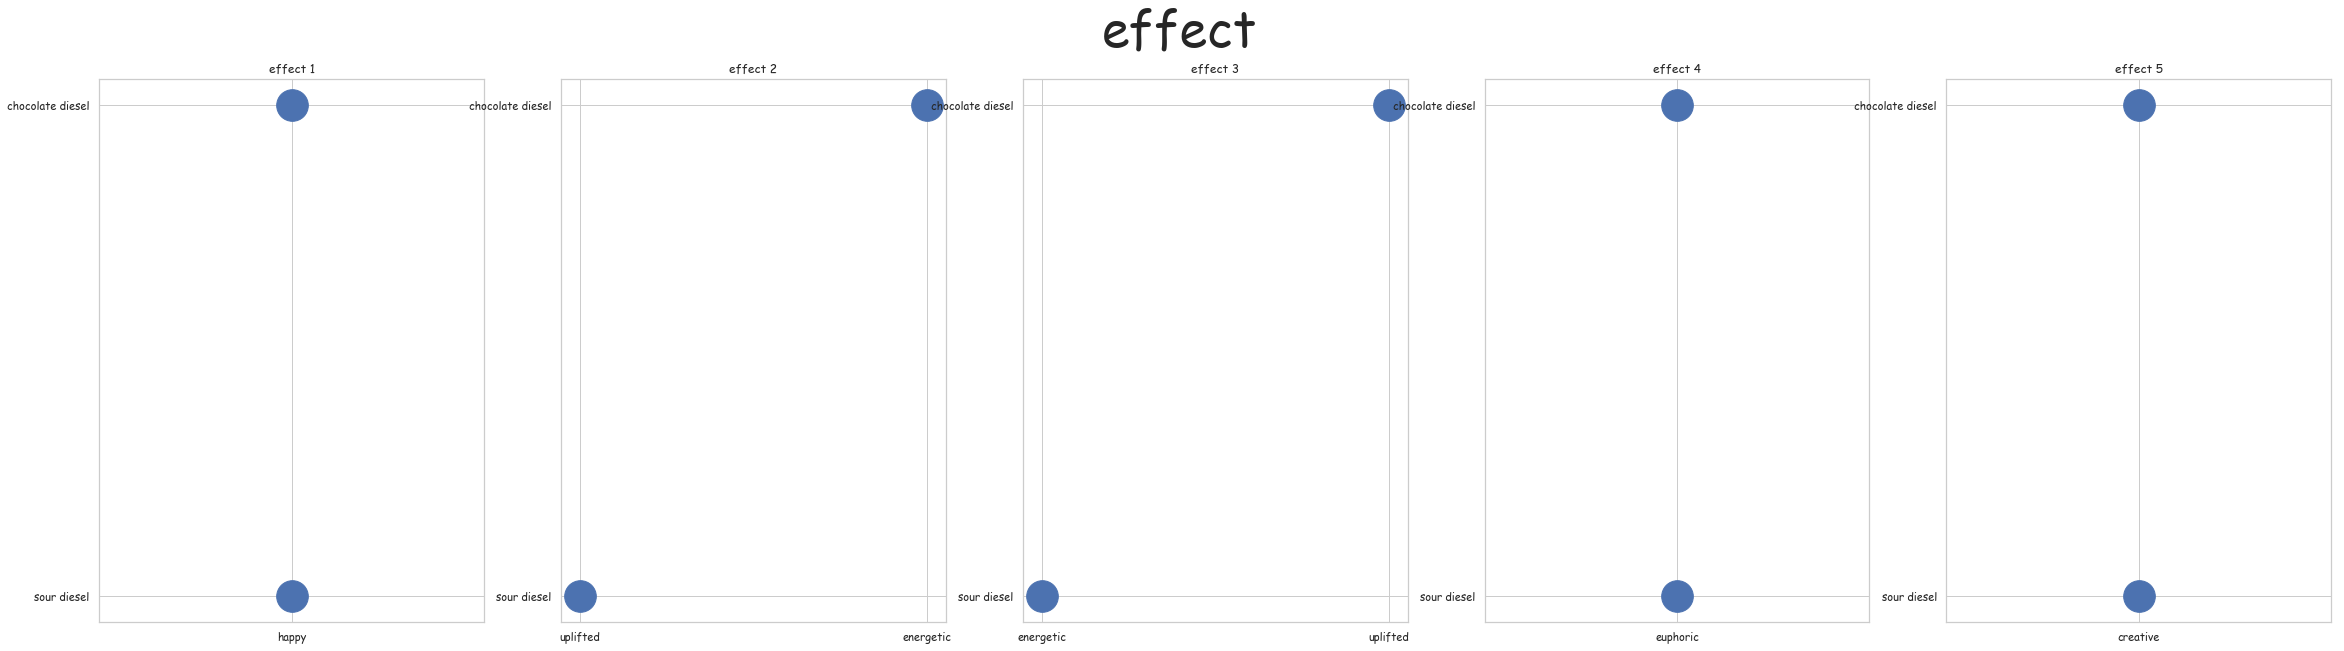

In [130]:
plot_top_matches(top_match, 'effect')

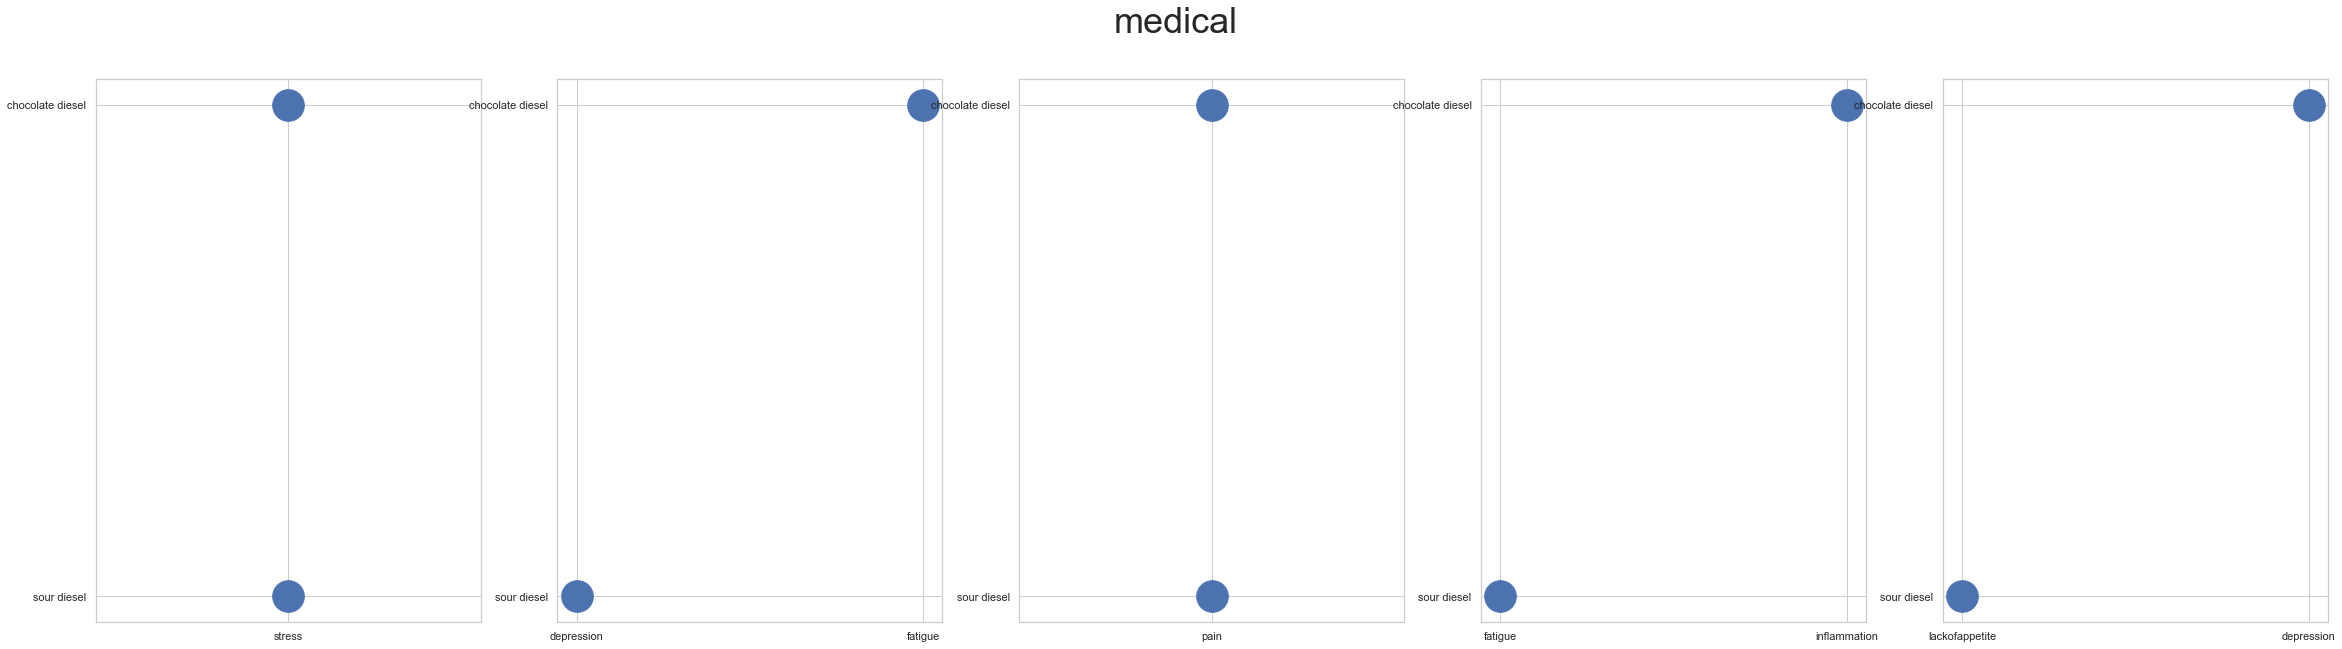

In [48]:
plot_top_matches(top_match, 'medical')

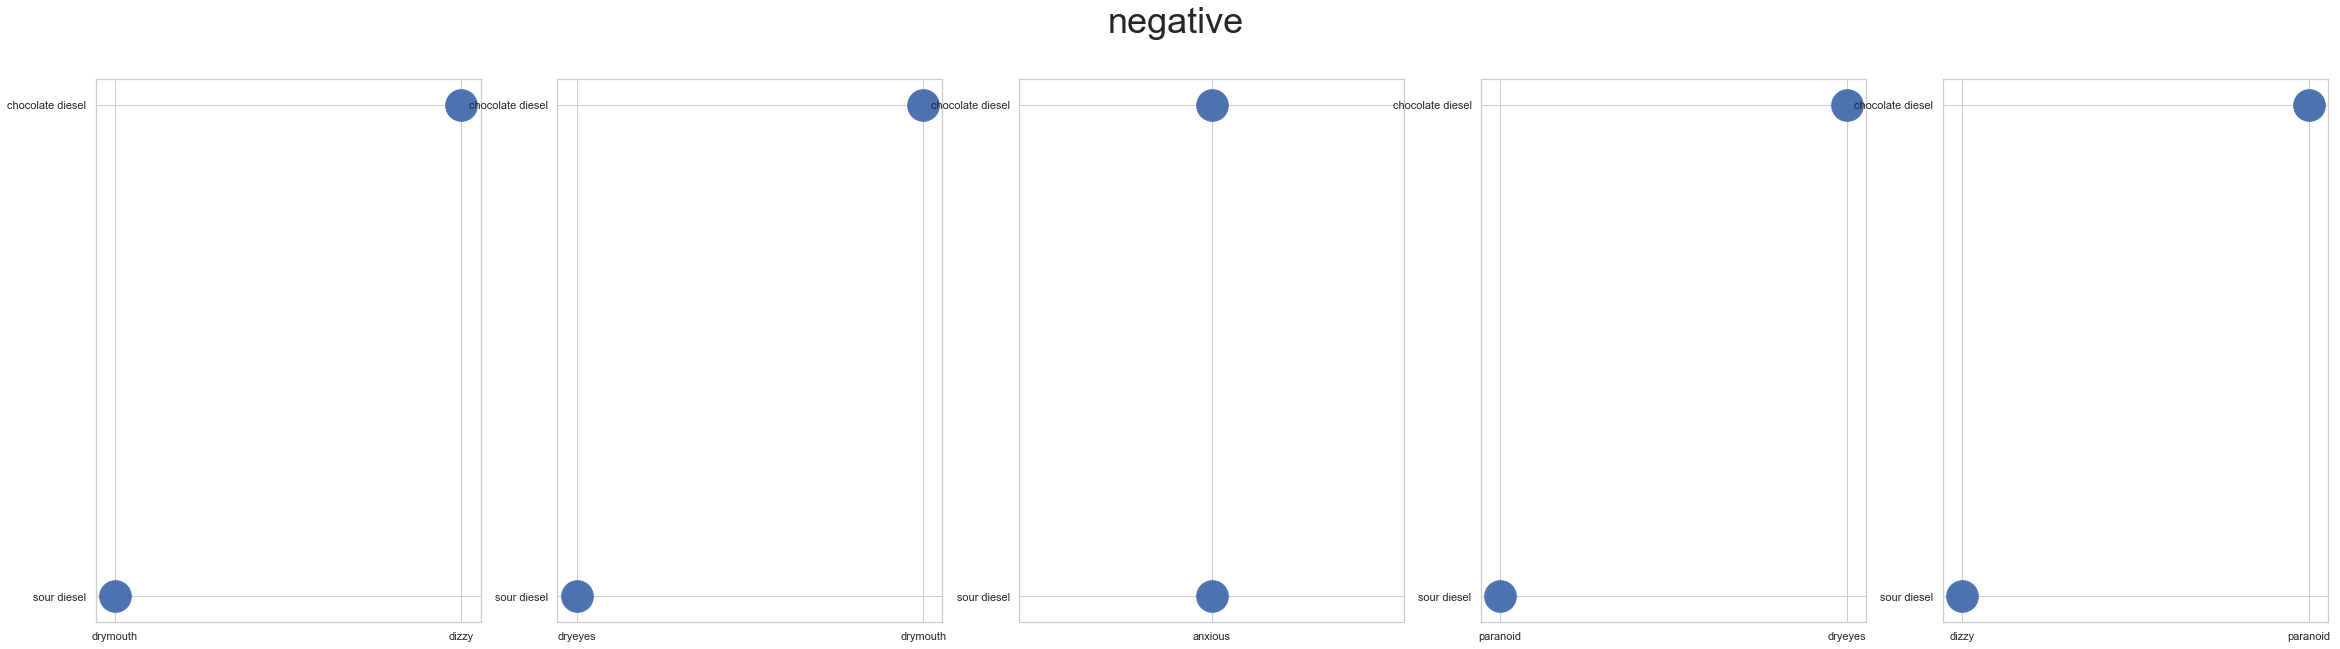

In [49]:
plot_top_matches(top_match, 'negative')

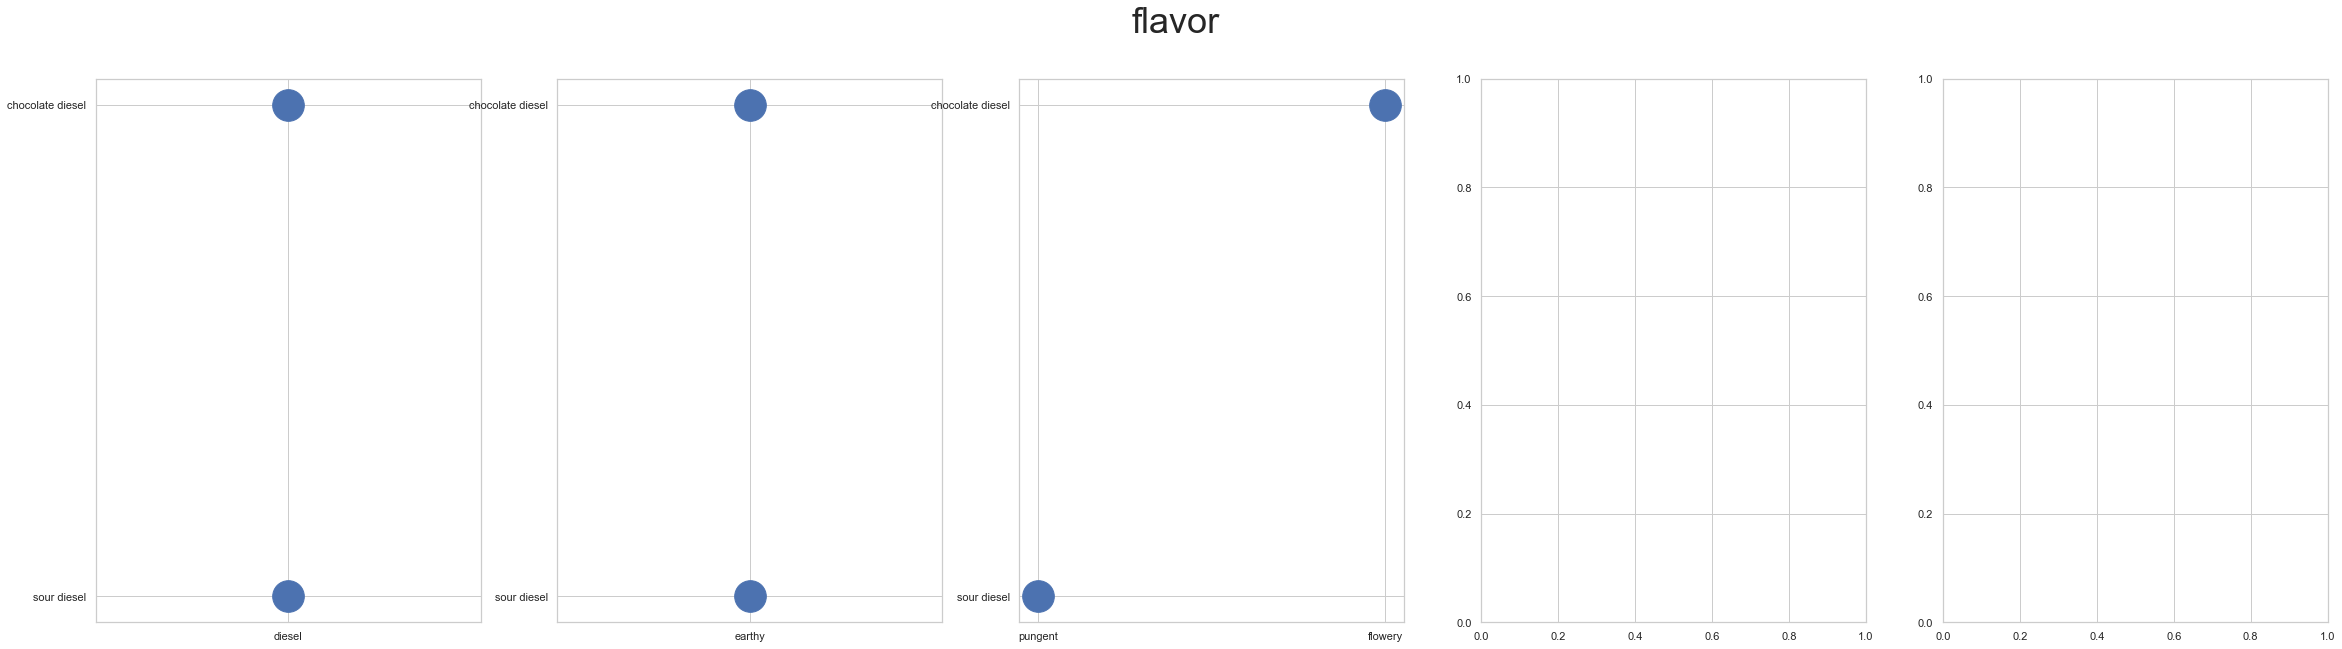

In [50]:
plot_top_matches(top_match, 'flavor')

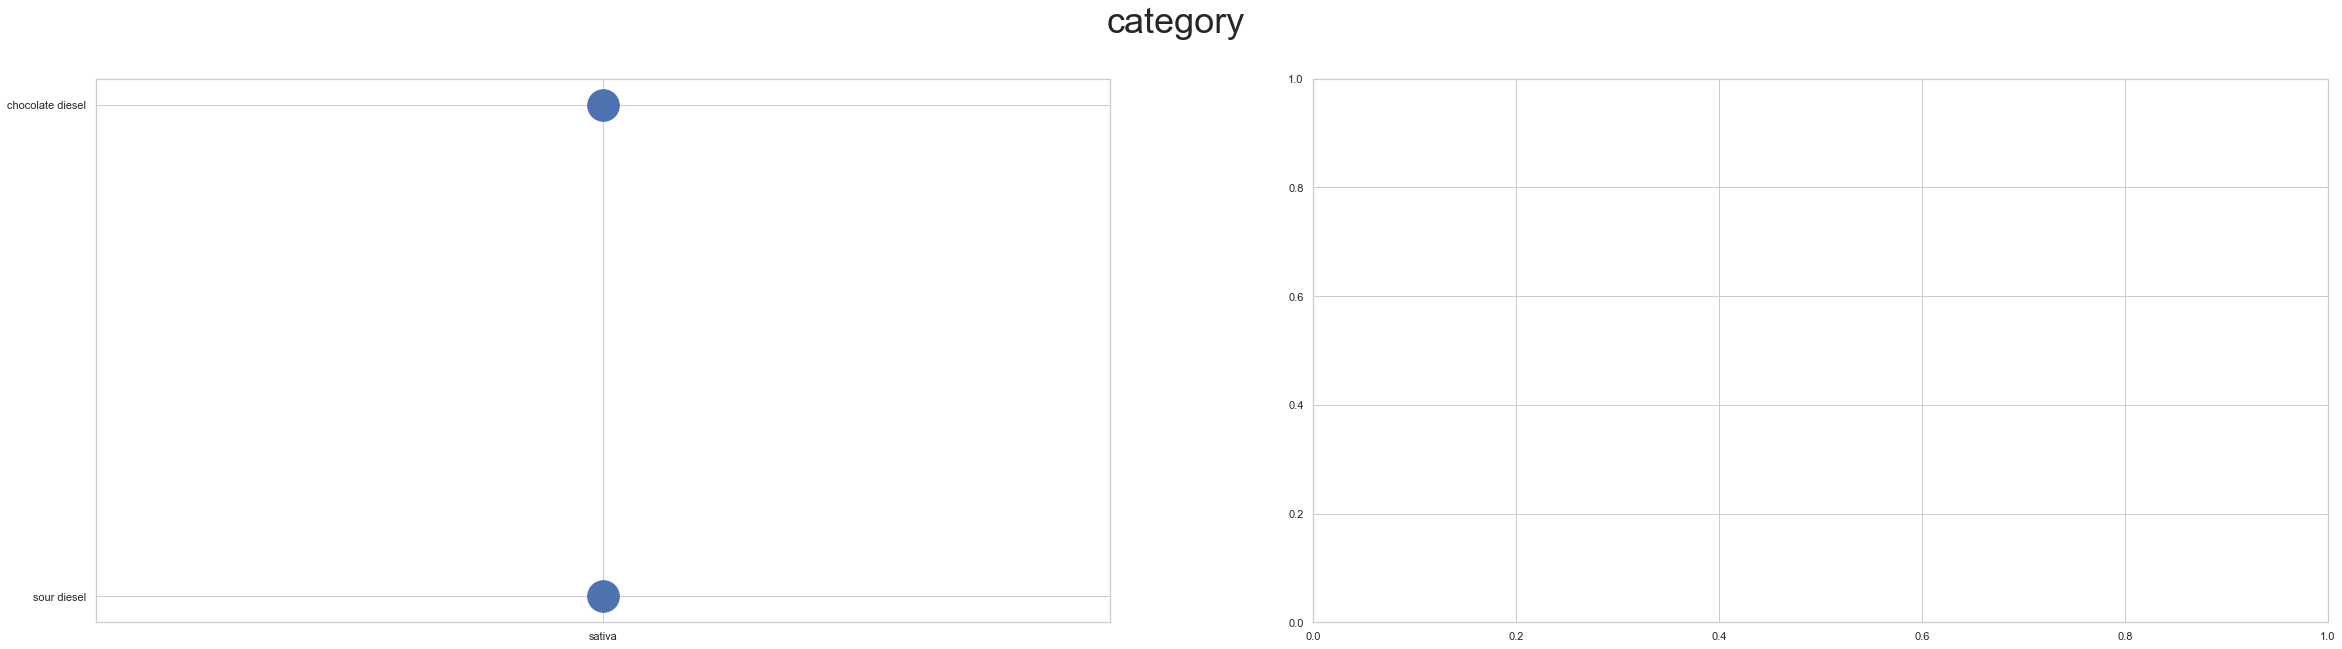

In [75]:
plot_category(top_match, 'category')

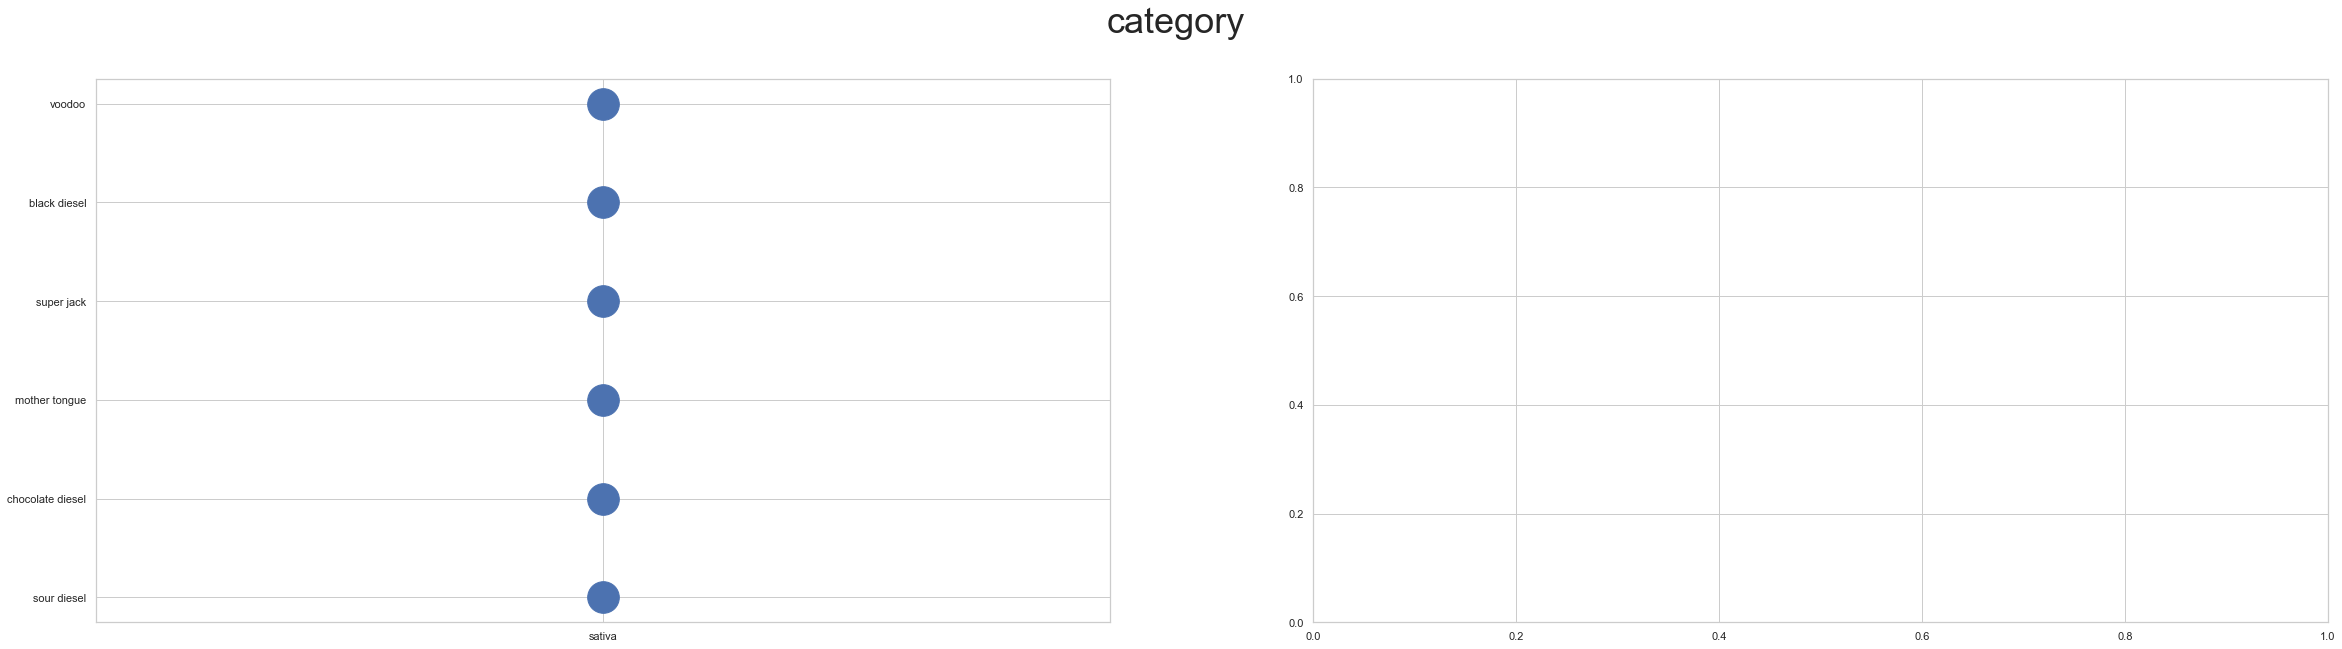

In [76]:
plot_category(top_matches, 'category')

In [96]:
def plot_groups(df, column_pre):
    try:
            
        names = list(df['strain'])

        values1 = list(df[(column_pre + '_1')])
        values2 = list(df[(column_pre + '_2')])
        values3 = list(df[(column_pre + '_3')])
        values4 = list(df[(column_pre + '_4')])
        values5 = list(df[(column_pre + '_5')])
    except:
        None

    try:
        fig, axs = plt.subplots(1, 5, figsize=(40, 10), sharey=False)
        axs[0].df.groupby(names, values1).size().unstack().plot(kind='bar',stacked=True)
        axs[0].title.set_text((column_pre + ' 1'))
        axs[1].df.groupby(['strain', (column_pre + '_2')]).size().unstack().plot(kind='bar',stacked=True)
        axs[1].title.set_text((column_pre + ' 2'))
        axs[2].df.groupby(['strain', (column_pre + '_3')]).size().unstack().plot(kind='bar',stacked=True)
        axs[2].title.set_text((column_pre + ' 3'))
        axs[3].df.groupby(['strain', (column_pre + '_4')]).size().unstack().plot(kind='bar',stacked=True)
        axs[3].title.set_text((column_pre + ' 4'))
        axs[4].df.groupby(['strain', (column_pre + '_5')]).size().unstack().plot(kind='bar',stacked=True)
        axs[4].title.set_text((column_pre + ' 5'))
        
    except: 
        None


    fig.suptitle(column_pre, fontsize=70)
    return plt.show()

### Build Project Website

#### Create SQL Database

In [234]:
import sqlite3

db = sqlite3.connect('strain_master.db')
unedited_df2.to_sql(name='strain_master', con=db, if_exists='replace')

In [236]:
conn = sqlite3.connect('strain_master.db')

In [237]:
c = conn.cursor()

In [487]:
c.execute("""SELECT * FROM strain_master;
          """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df

2622


,index,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3,category,combined
0,0,100 og,happy,uplifted,relaxed,euphoric,sleepy,stress,pain,depression,insomnia,lackofappetite,drymouth,dizzy,dryeyes,anxious,paranoid,earthy,diesel,pungent,hybrid,"happy, uplifted, relaxed, euphoric, sleepy, stress, pain, depression, insomnia, lackofappetite, drymouth, dizzy, dryeyes, anxious, paranoid, earthy, diesel, pungent, hybrid"
1,1,1024,uplifted,energetic,happy,relaxed,focused,pain,fatigue,depression,stress,inflammation,drymouth,dryeyes,dizzy,paranoid,anxious,tropical,mint,blueberry,sativa,"uplifted, energetic, happy, relaxed, focused, pain, fatigue, depression, stress, inflammation, drymouth, dryeyes, dizzy, paranoid, anxious, tropical, mint, blueberry, sativa"
2,2,12 year og,focused,creative,hungry,euphoric,aroused,depression,pain,stress,none,none,anxious,dizzy,dryeyes,drymouth,headache,diesel,none,none,hybrid,"focused, creative, hungry, euphoric, aroused, depression, pain, stress, none, none, anxious, dizzy, dryeyes, drymouth, headache, diesel, none, none, hybrid"
3,3,13 dawgs,sleepy,euphoric,focused,energetic,relaxed,pain,depression,stress,inflammation,fatigue,anxious,dryeyes,headache,drymouth,none,diesel,apricot,citrus,hybrid,"sleepy, euphoric, focused, energetic, relaxed, pain, depression, stress, inflammation, fatigue, anxious, dryeyes, headache, drymouth, none, diesel, apricot, citrus, hybrid"
4,4,22,energetic,focused,happy,uplifted,creative,pain,depression,fatigue,stress,musclespasms,headache,none,none,none,none,diesel,pine,skunk,hybrid,"energetic, focused, happy, uplifted, creative, pain, depression, fatigue, stress, musclespasms, headache, none, none, none, none, diesel, pine, skunk, hybrid"
5,5,24k gold,happy,relaxed,euphoric,uplifted,creative,stress,depression,pain,fatigue,insomnia,drymouth,dryeyes,dizzy,anxious,headache,orange,citrus,sweet,hybrid,"happy, relaxed, euphoric, uplifted, creative, stress, depression, pain, fatigue, insomnia, drymouth, dryeyes, dizzy, anxious, headache, orange, citrus, sweet, hybrid"
6,6,3 bears og,relaxed,giggly,sleepy,tingly,energetic,pain,stress,lackofappetite,musclespasms,insomnia,drymouth,dryeyes,headache,anxious,none,diesel,sweet,butter,indica,"relaxed, giggly, sleepy, tingly, energetic, pain, stress, lackofappetite, musclespasms, insomnia, drymouth, dryeyes, headache, anxious, none, diesel, sweet, butter, indica"
7,7,3 kings,happy,relaxed,uplifted,euphoric,energetic,stress,pain,depression,headaches,eyepressure,drymouth,dryeyes,dizzy,headache,paranoid,earthy,diesel,pine,hybrid,"happy, relaxed, uplifted, euphoric, energetic, stress, pain, depression, headaches, eyepressure, drymouth, dryeyes, dizzy, headache, paranoid, earthy, diesel, pine, hybrid"
8,8,303 og,focused,relaxed,uplifted,euphoric,sleepy,pain,depression,insomnia,musclespasms,headaches,drymouth,dryeyes,dizzy,anxious,none,diesel,earthy,woody,indica,"focused, relaxed, uplifted, euphoric, sleepy, pain, depression, insomnia, musclespasms, headaches, drymouth, dryeyes, dizzy, anxious, none, diesel, earthy, woody, indica"
9,9,3d cbd,relaxed,happy,uplifted,focused,talkative,pain,stress,inflammation,headaches,depression,drymouth,dryeyes,none,none,none,diesel,woody,earthy,sativa,"relaxed, happy, uplifted, focused, talkative, pain, stress, inflammation, headaches, depression, drymouth, dryeyes, none, none, none, diesel, woody, earthy, sativa"


#### Create Presentation

In [243]:
state_chart = pd.read_csv('state_chart.csv')

In [244]:
state_chart.head()

,State,Legal Status,Medicinal,Decriminalized
0,Alabama,Fully Illegal,No,No
1,Alaska,Fully Legal,Yes,Yes
2,Arizona,Mixed,Yes,No
3,Arkansas,Mixed,Yes,No
4,California,Fully Legal,Yes,Yes


In [251]:
# of states where thc is fully illegal - 17 (medicinal cbd legal in 5 of those)
state_chart[state_chart['Legal Status'] == 'Fully Illegal']

,State,Legal Status,Medicinal,Decriminalized
0,Alabama,Fully Illegal,No,No
12,Idaho,Fully Illegal,No,No
16,Kansas,Fully Illegal,No,No
17,Kentucky,Fully Illegal,No,No
24,Mississippi,Fully Illegal,No,Reduced
27,Nebraska,Fully Illegal,No,Reduced
33,North Carolina,Fully Illegal,No,Reduced
40,South Carolina,Fully Illegal,No,No
41,South Dakota,Fully Illegal,No,No
42,Tennessee,Fully Illegal,No,No


In [252]:
# of states where marijuana is fully legal and decriminalized- 11
# +15 states where there is reduced criminalization
state_chart[state_chart['Legal Status'] == 'Fully Legal']

,State,Legal Status,Medicinal,Decriminalized
1,Alaska,Fully Legal,Yes,Yes
4,California,Fully Legal,Yes,Yes
5,Colorado,Fully Legal,Yes,Yes
8,District of Columbia,Fully Legal,Yes,Yes
19,Maine,Fully Legal,Yes,Yes
21,Massachusetts,Fully Legal,Yes,Yes
22,Michigan,Fully Legal,Yes,Yes
28,Nevada,Fully Legal,Yes,Yes
37,Oregon,Fully Legal,Yes,Yes
45,Vermont,Fully Legal,Yes,Yes


In [257]:
# of states where marijuana is decriminalized - 11
len(state_chart[state_chart['Decriminalized'] == 'Reduced'])

15

In [ ]:
plot(table1v, 'effect')

### GUI

In [ ]:
root = tk.Tk()

HEIGHT = 400
WIDTH = 600

canvas = tk.Canvas(root, height = HEIGHT, width = WIDTH)
canvas.pack()

# background_image = tk.PhotoImage(file = 'leaf_shot1.png')
# background_label = tk.Label(root, image = background_image)
# background_label.place(relwidth = 1, relheight = 1)

frame = tk.Frame(root, bg = '#3fa540', bd = 5)
frame.place(relx = 0.5, rely = 0.1, relwidth = 0.75, relheight = 0.1, anchor = 'n')

strain = tk.Entry(frame, font = 40)
strain.place(relwidth = 0.65, relheight = 1)

button = tk.Button(frame, text = 'Find Alternative', font = 40, command = lambda: recommended_strains(strain.get()))
button.place(relx = 0.7, relheight = 1, relwidth = 0.3)


lower_frame = tk.Frame(root, bg = '#3fa540', bd = 10)
lower_frame.place(relx = 0.5, rely = 0.25, relwidth = 0.75, relheight = 0.6, anchor = 'n')

label = tk.Label(lower_frame)
label.place(relwidth = 1, relheight = 1)




root.mainloop()

In [ ]:
#Visualize the top matches

def plot(df, column_pre):
    try:
        df.groupby(['strain', (column_pre + '_1')]).size().unstack().plot(kind='bar',stacked=True)
        df.groupby(['strain', (column_pre + '_2')]).size().unstack().plot(kind='bar',stacked=True)
        df.groupby(['strain', (column_pre + '_3')]).size().unstack().plot(kind='bar',stacked=True)
        df.groupby(['strain', (column_pre + '_4')]).size().unstack().plot(kind='bar',stacked=True)
        df.groupby(['strain', (column_pre + '_5')]).size().unstack().plot(kind='bar',stacked=True)
        return plt.show()
    except:
        return plt.show()

### Set Up For Qualitative Polling

In [466]:
# collect 10 random samples from dataframe

final_df.sample(n=10, random_state=17)

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

I'm going to take the 10 randomly selected strains and for each strain randomly select 2 strains to go with the number one recommended strain in a survey for each randomly selected strain.

In [467]:
# find top recommendation for each strain and put into a table

def rec_survey(strain):
    recommended_strains(strain)
    tablev1 = build_comp_table_vec(unedited_df, strain)
    return tablev1.iloc[:2,:-2]

In [468]:
# Blue Zkittlex rec

rec_survey('blue zkittlez')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
375,blue zkittlez,relaxed,sleepy,happy,hungry,uplifted,stress,pain,depression,inflammation,insomnia,drymouth,dryeyes,headache,dizzy,anxious,sweet,berry,citrus
716,dj short blueberry,relaxed,sleepy,happy,euphoric,uplifted,stress,pain,depression,insomnia,inflammation,drymouth,dryeyes,anxious,dizzy,headache,blueberry,sweet,berry


In [469]:
#random blue zkittlez sample answers for survey

final_df.sample(n=2, random_state=11)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [470]:
# Old Toby rec

rec_survey('old toby')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
1787,old toby,creative,happy,energetic,euphoric,relaxed,stress,cramps,fatigue,pain,depression,dryeyes,drymouth,none,none,none,lime,pine,chemical
1194,heavenly og,euphoric,happy,relaxed,energetic,creative,pain,stress,depression,fatigue,none,drymouth,none,none,none,none,earthy,pine,woody


In [471]:
#random blue zkittlez sample answers for survey

final_df.sample(n=2, random_state=101)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [472]:
#Cherry Pie rec

rec_survey('cherry pie')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
575,cherry pie,relaxed,happy,euphoric,uplifted,giggly,stress,depression,pain,insomnia,lackofappetite,drymouth,dryeyes,dizzy,anxious,paranoid,sweet,berry,earthy
454,bubblegum kush,relaxed,euphoric,happy,sleepy,uplifted,stress,depression,insomnia,pain,lackofappetite,drymouth,dryeyes,dizzy,anxious,paranoid,sweet,earthy,berry


In [473]:
# random cherry pie sample answers for survey

final_df.sample(n=2, random_state=15)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [474]:
# Sexxpot Rec

rec_survey('sexxpot')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
2162,sexxpot,aroused,happy,relaxed,euphoric,energetic,pain,stress,fatigue,lackofappetite,musclespasms,drymouth,dryeyes,paranoid,none,none,coffee,pungent,earthy
1363,kelly hill gold,happy,energetic,euphoric,talkative,aroused,pain,stress,cramps,inflammation,musclespasms,dryeyes,drymouth,none,none,none,earthy,pepper,coffee


In [475]:
#random sexxpot sample answers for survey

final_df.sample(n=2, random_state=6)  #sexxpot

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [476]:
# Hoodwreck rec

rec_survey('hoodwreck')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
1232,hoodwreck,euphoric,happy,creative,energetic,focused,fatigue,cramps,depression,eyepressure,headaches,none,none,none,none,none,sweet,earthy,flowery
134,apollo 13 haze,creative,energetic,euphoric,focused,happy,depression,fatigue,none,none,none,anxious,dryeyes,none,none,none,citrus,earthy,flowery


In [477]:
#random hoodwreck sample answers for survey

final_df.sample(n=2, random_state=75)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [478]:
# Madagascar rec

rec_survey('madagascar')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
1545,madagascar,sleepy,happy,euphoric,relaxed,creative,insomnia,stress,pain,headaches,musclespasms,dryeyes,drymouth,dizzy,none,none,earthy,skunk,sweet
746,deep chunk,relaxed,happy,euphoric,sleepy,creative,insomnia,stress,pain,headaches,musclespasms,drymouth,none,none,none,none,earthy,lavender,sweet


In [479]:
#random madagascar sample answers for survey

final_df.sample(n=2, random_state=8)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [480]:
# Purple Star rec

rec_survey('purple star')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
2019,purple star,focused,relaxed,happy,creative,tingly,pain,insomnia,stress,depression,inflammation,dryeyes,drymouth,anxious,dizzy,none,berry,grape,earthy
1245,humboldt headband,euphoric,relaxed,happy,sleepy,focused,stress,depression,insomnia,lackofappetite,pain,dizzy,drymouth,anxious,dryeyes,none,berry,grape,sweet


In [481]:
#random purple star sample answers for survey

final_df.sample(n=2, random_state=987)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [482]:
# God Bud rec

rec_survey('god bud')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
1023,god bud,relaxed,happy,euphoric,sleepy,hungry,stress,depression,insomnia,pain,fatigue,drymouth,dryeyes,paranoid,dizzy,headache,earthy,pungent,woody
1336,jupiter og,relaxed,sleepy,hungry,happy,euphoric,stress,depression,pain,insomnia,musclespasms,drymouth,dryeyes,paranoid,dizzy,headache,earthy,pungent,flowery


In [483]:
#random god bud sample answers for survey

final_df.sample(n=2, random_state=1008)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [484]:
# Super Sour Diesel rec

rec_survey('super sour diesel')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
2403,super sour diesel,happy,euphoric,relaxed,energetic,uplifted,stress,depression,pain,fatigue,headaches,drymouth,dryeyes,headache,dizzy,paranoid,diesel,citrus,pungent
2263,sour jack,focused,energetic,uplifted,happy,euphoric,depression,stress,fatigue,headaches,pain,drymouth,dizzy,paranoid,dryeyes,headache,citrus,diesel,lemon


In [485]:
#random super sour diesel sample answers for survey

final_df.sample(n=2, random_state=732)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [486]:
# Truffula Tree rec

rec_survey('truffula tree')

,strain,effect_1,effect_2,effect_3,effect_4,effect_5,medical_1,medical_2,medical_3,medical_4,medical_5,negative_1,negative_2,negative_3,negative_4,negative_5,flavor_1,flavor_2,flavor_3
2574,truffula tree,aroused,creative,energetic,euphoric,giggly,none,none,none,none,none,none,none,none,none,none,sweet,none,none
94,alley cat kush,aroused,creative,energetic,euphoric,focused,none,none,none,none,none,none,none,none,none,none,none,none,none


In [575]:
#random truffula tree sample answers for survey

final_df.sample(n=2, random_state=10)  

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__aroused,eff1__creative,eff1__energetic,eff1__euphoric,eff1__focused,eff1__giggly,eff1__happy,eff1__hungry,eff1__relaxed,eff1__sleepy,eff1__talkative,eff1__tingly,eff1__uplifted,eff2__aroused,eff2__creative,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__tingly,eff2__uplifted,eff3__aroused,eff3__creative,eff3__energetic,eff3__euphoric,eff3__focused,eff3__giggly,eff3__happy,eff3__hungry,eff3__relaxed,eff3__sleepy,eff3__talkative,eff3__tingly,eff3__uplifted,eff4__aroused,eff4__creative,eff4__energetic,eff4__euphoric,eff4__focused,eff4__giggly,eff4__happy,eff4__hungry,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__tingly,eff4__uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__giggly,eff5__happy,eff5__hungry,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__cramps,med1__depression,med1__eyepressure,med1__fatigue,med1__headaches,med1__inflammation,med1__insomnia,med1__lackofappetite,med1__musclespasms,med1__nausea,med1__pain,med1__seizures,med1__spasticity,med1__stress,med2__cramps,med2__depression,med2__eyepressure,med2__fatigue,med2__headaches,med2__inflammation,med2__insomnia,med2__lackofappetite,med2__musclespasms,med2__nausea,med2__pain,med2__seizures,med2__spasticity,med2__stress,med3__cramps,med3__depression,med3__eyepressure,med3__fatigue,med3__headaches,med3__inflammation,med3__insomnia,med3__lackofappetite,med3__musclespasms,med3__nausea,med3__pain,med3__seizures,med3__spasticity,med3__stress,med4__cramps,med4__depression,med4__eyepressure,med4__fatigue,med4__headaches,med4__inflammation,med4__insomnia,med4__lackofappetite,med4__musclespasms,med4__nausea,med4__pain,med4__seizures,med4__spasticity,med4__stress,med5__cramps,med5__depression,med5__eyepressure,med5__fatigue,med5__headaches,med5__inflammation,med5__insomnia,med5__lackofappetite,med5__musclespasms,med5__nausea,med5__pain,med5__seizures,med5__spasticity,med5__stress,neg1__anxious,neg1__dizzy,neg1__dryeyes,neg1__drymouth,neg1__headache,neg1__paranoid,neg2__anxious,neg2__dizzy,neg2__dryeyes,neg2__drymouth,neg2__headache,neg2__paranoid,neg3__anxious,neg3__dizzy,neg3__dryeyes,neg3__drymouth,neg3__headache,neg3__paranoid,neg4__anxious,neg4__dizzy,neg4__dryeyes,neg4__drymouth,neg4__headache,neg4__paranoid,neg5__anxious,neg5__dizzy,neg5__dryeyes,neg5__drymouth,neg5__headache,neg5__paranoid,flav1__ammonia,flav1__apple,flav1__apricot,flav1__berry,flav1__blueberry,flav1__bluecheese,flav1__butter,flav1__cheese,flav1__chemical,flav1__chestnut,flav1__citrus,flav1__coffee,flav1__diesel,flav1__earthy,flav1__flowery,flav1__grape,flav1__grapefruit,flav1__honey,flav1__lavender,flav1__lemon,flav1__lime,flav1__mango,flav1__menthol,flav1__mint,flav1__nutty,flav1__orange,flav1__peach,flav1__pear,flav1__pepper,flav1__pine,flav1__pineapple,flav1__plum,flav1__pungent,flav1__rose,flav1__sage,flav1__skunk,flav1__spicy/herbal,flav1__strawberry,flav1__sweet,flav1__tar,flav1__tea,flav1__tobacco,flav1__treefruit,flav1__tropical,flav1__vanilla,flav1__violet,flav1__woody,flav2__ammonia,flav2__apple,flav2__apricot,flav2__berry,flav2__blueberry,flav2__bluecheese,flav2__butter,flav2__cheese,flav2__chemical,flav2__chestnut,flav2__citrus,flav2__coffee,flav2__diesel,flav2__earthy,flav2__flowery,flav2__grape,flav2__grapefruit,flav2__honey,flav2__lavender,flav2__lemon,flav2__lime,flav2__mango,flav2__menthol,flav2__mint,flav2__nutty,flav2__orange,flav2__peach,flav2__pear,flav2__pepper,flav2__pine,flav2__pineapple,flav2__plum,flav2__pungent,flav2__rose,flav2__sage,flav2__skunk,flav2__spicy/herbal,flav2__strawberry,flav2__sweet,flav2__tar,flav2__tea,flav2__tobacco,flav2__treefruit,flav2__tropical,flav2__vanilla,flav2__violet,flav2__woody,flav3__ammonia,flav3__apple,flav3__apricot,flav3__berry,flav3__blueberry,flav3__bluecheese,flav3__butter,flav3__cheese,flav3__chemical,flav3__chestnut,flav3__citrus,flav3__c

In [ ]:
plot(table2, 'effect')

In [ ]:
plot(table2, 'medical')

In [ ]:
plot(table2, 'negative')

In [ ]:
plot(table2, 'flavor')

In [ ]:
# Setting the positions and width for the bars
pos = list(range(len(table2['effect_1']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(table2.groupby(['strain','effect_1']))

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar(table2['strain'],
        
        #[p + width for p in pos], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E')
        # with label the second value in first_name
        #label=table2['strain'][1] 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar(table2['strain'],
        [p + width*2 for p in pos], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222') 
        # with label the third value in first_name
        #label=table2['strain'][2]) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Effect_1 Outcomes')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
#ax.set_xticklabels(unedited_df['first_name'])

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(table2['pre_score'] + table2['mid_score'] + table2['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['Pre Score', 'Mid Score', 'Post Score'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
pd.value_counts(unedited_df['effect_2']).plot.bar()
plt.show()

In [ ]:
pd.value_counts(unedited_df['effect_3']).plot.bar()
plt.show()

In [ ]:
pd.value_counts(unedited_df['effect_4']).plot.bar()
plt.show()

In [ ]:
pd.value_counts(unedited_df['effect_5']).plot.bar()
plt.show()